# Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

# Content
* This dataset contains about 10 years of daily weather observations from many locations across Australia.
 
 
* RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

# Data Description

* Location - Name of the city from Australia.
* MinTemp - The Minimum temperature during a particular day. (degree Celsius)
* MaxTemp - The maximum temperature during a particular day. (degree Celsius)
* Rainfall - Rainfall during a particular day. (millimeters)
* Evaporation - Evaporation during a particular day. (millimeters)
* Sunshine - Bright sunshine during a particular day. (hours)
* WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)
* WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)
* WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)
* WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)
* WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)
* WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)
* Humidity9am - The humidity of the wind at 9 am. (percent)
* Humidity3pm - The humidity of the wind at 3 pm. (percent)
* Pressure9am - Atmospheric pressure at 9 am. (hectopascals)
* Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)
* Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)
* Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)
* Temp9am - The temperature at 9 am. (degree Celsius)
* Temp3pm - The temperature at 3 pm. (degree Celsius)
* RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.
* RainTomorrow - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

# Rain prediction for next day
The targets of the analysis are:

* To analyze the dataset content using EDA and to understand if it's possible build one model allowing to predict weather for the whole Australian continent or not.  


* To train a model allowing to predict rain for tomorrow with the highest accuracy, F1 score and ROC-AUC metric.


* To evaluate feature importance of a model and to analyze the most impactful factors. The dataset was taken from Kaggle repository: Rain in Australia

## Step 1: Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings  #supress warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\weatherAUS.CSV')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.duplicated().sum() # No duplicate row in dataset

0

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Step 2: Data Cleansing

In [8]:
# I drop Date column because it is not much important column 

df.drop('Date',axis=1,inplace=True)

In [9]:
df.duplicated().sum()

215

As you see after dropping the Date Column there are 215 duplicated rows. So, we drop them.

In [10]:
# Drop duplicated rows based on all columns

df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Location             0
MinTemp           1270
MaxTemp           1052
Rainfall          3089
Evaporation      62576
Sunshine         69621
WindGustDir      10111
WindGustSpeed    10048
WindDir9am       10351
WindDir3pm        4013
WindSpeed9am      1552
WindSpeed3pm      2847
Humidity9am       2439
Humidity3pm       4292
Pressure9am      14850
Pressure3pm      14813
Cloud9am         55673
Cloud3pm         59143
Temp9am           1552
Temp3pm           3394
RainToday         3089
RainTomorrow      3097
dtype: int64

In [13]:
df.isnull().sum().sum()

338872

There are so many null values in dataset. So, I fill them. 

##  Fill the Missing Values by using Simple Imputer

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# create a SimpleImputer object to fill missing values with mean

imputer = SimpleImputer(strategy='mean')

In [16]:
# fit and transform the imputer to the selected columns

cols_to_impute = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                    'WindSpeed3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Humidity3pm',
                  'Humidity9am']

In [17]:
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [18]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10111
WindGustSpeed        0
WindDir9am       10351
WindDir3pm        4013
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3089
RainTomorrow      3097
dtype: int64

In [19]:
df.dropna(subset=['RainTomorrow'], inplace=True)

We drop the null values of 'RainTomorrow' because its our prediction column and we don't fill it with mean or mode.

In [20]:
df.shape

(142148, 22)

In [21]:
# create another SimpleImputer object to fill missing values with median

imputer2 = SimpleImputer(strategy='most_frequent')

In [22]:
# fit and transform the imputer to the selected column

cols_to_impute2 = ['WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [23]:
df[cols_to_impute2] = imputer2.fit_transform(df[cols_to_impute2])

In [24]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now there is no null value in our dataset

In [25]:
df.nunique()

Location          49
MinTemp          390
MaxTemp          506
Rainfall         680
Evaporation      357
Sunshine         146
WindGustDir       16
WindGustSpeed     68
WindDir9am        16
WindDir3pm        16
WindSpeed9am      44
WindSpeed3pm      45
Humidity9am      102
Humidity3pm      102
Pressure9am      547
Pressure3pm      550
Cloud9am          11
Cloud3pm          11
Temp9am          441
Temp3pm          501
RainToday          2
RainTomorrow       2
dtype: int64

There is only 2 categories in 'RainToday','RainTomorrow'. So, we replace them with 0,1

In [26]:
df['RainToday'] = df['RainToday'].replace(['No','Yes'], [0,1],regex=True)
df['RainTomorrow'] = df['RainTomorrow'].replace(['No','Yes'], [0,1],regex=True)

In [27]:
df.RainTomorrow.value_counts()

0    110274
1     31874
Name: RainTomorrow, dtype: int64

In [28]:
df.RainToday.value_counts()

0    110693
1     31455
Name: RainToday, dtype: int64

In [29]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.733925,0.103316,0.353735,0.052236,0.173361,0.174938,0.174187,-0.232382,0.005930,-0.424336,-0.434021,0.061111,0.015674,0.897998,0.699824,0.055647,0.083725
MaxTemp,0.733925,1.000000,-0.074200,0.442245,0.331690,0.066298,0.014580,0.050374,-0.499794,-0.499719,-0.309080,-0.397416,-0.226937,-0.214566,0.880092,0.969741,-0.226476,-0.159090
Rainfall,0.103316,-0.074200,1.000000,-0.038197,-0.173007,0.127265,0.085982,0.056767,0.221398,0.249620,-0.159679,-0.120368,0.171540,0.145798,0.011385,-0.077556,0.500263,0.236860
Evaporation,0.353735,0.442245,-0.038197,1.000000,0.290225,0.147346,0.140694,0.094152,-0.377626,-0.289930,-0.211832,-0.231353,-0.152303,-0.147805,0.417355,0.429220,-0.141097,-0.089562
Sunshine,0.052236,0.331690,-0.173007,0.290225,1.000000,-0.022369,0.005965,0.039720,-0.352251,-0.446994,0.030847,-0.015551,-0.537906,-0.559555,0.210448,0.349478,-0.238970,-0.327042
WindGustSpeed,0.173361,0.066298,0.127265,0.147346,-0.022369,1.000000,0.577790,0.658334,-0.209226,-0.025751,-0.426586,-0.384622,0.052176,0.080107,0.146761,0.032245,0.148271,0.225306
WindSpeed9am,0.174938,0.014580,0.085982,0.140694,0.005965,0.577790,1.000000,0.513067,-0.269031,-0.031001,-0.215159,-0.165038,0.018920,0.040897,0.128769,0.005023,0.100568,0.090534
WindSpeed3pm,0.174187,0.050374,0.056767,0.094152,0.039720,0.658334,0.513067,1.000000,-0.144264,0.015782,-0.277469,-0.239725,0.041182,0.019670,0.162143,0.028444,0.078365,0.086921
Humidity9am,-0.232382,-0.499794,0.221398,-0.377626,-0.352251,-0.209226,-0.269031,-0.144264,1.000000,0.659865,0.131593,0.176164,0.354485,0.274704,-0.471141,-0.492441,0.348859,0.255182
Humidity3pm,0.005930,-0.499719,0.249620,-0.289930,-0.446994,-0.025751,-0.031001,0.015782,0.659865,1.000000,-0.025781,0.048554,0.400015,0.407888,-0.217573,-0.555778,0.370578,0.439721


<AxesSubplot:>

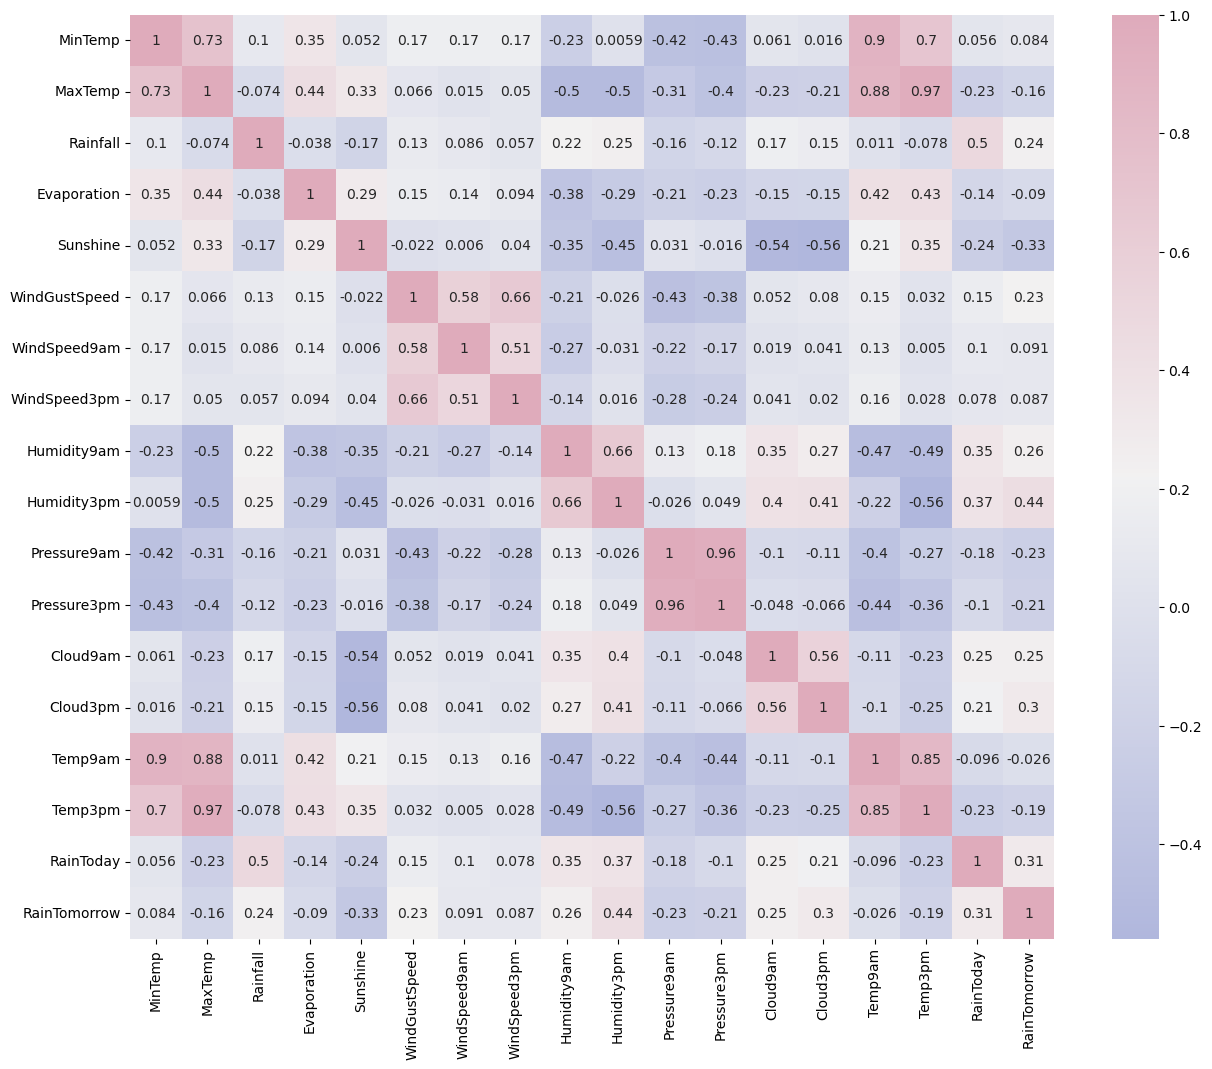

In [30]:
# Correlation amongst numeric attributes

corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

### From above heatmap we can see that 'MaxTemp' and 'Temp3pm'  or  'Pressure9am' and 'Pressure3pm' have high Correlation. So, we drop one of them in both.

In [31]:
df.drop(['Temp3pm','Pressure3pm'],axis=1,inplace=True)

# Step 3: Visualising the Data for better understanding

## 3.1 Univariate Analysis :- 
When we perform analysis on a particular column it is known as univariate analysis.

### a) Categorical Data

### Count of rain today and tomorrow

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

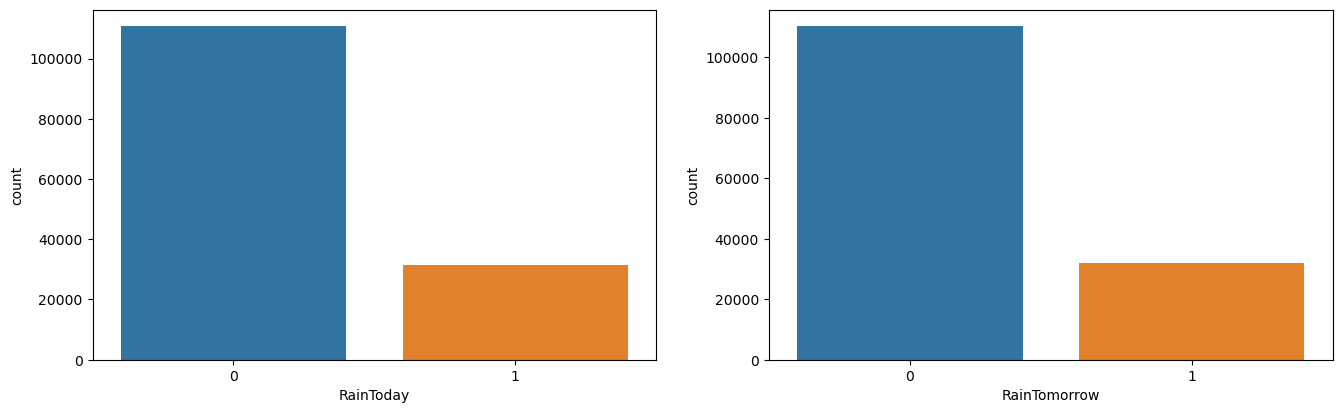

In [32]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.countplot(df['RainToday'])
plt.subplot(2,2,2)
sns.countplot(df['RainTomorrow'])

### Direction of wind at 9 am, 3 pm

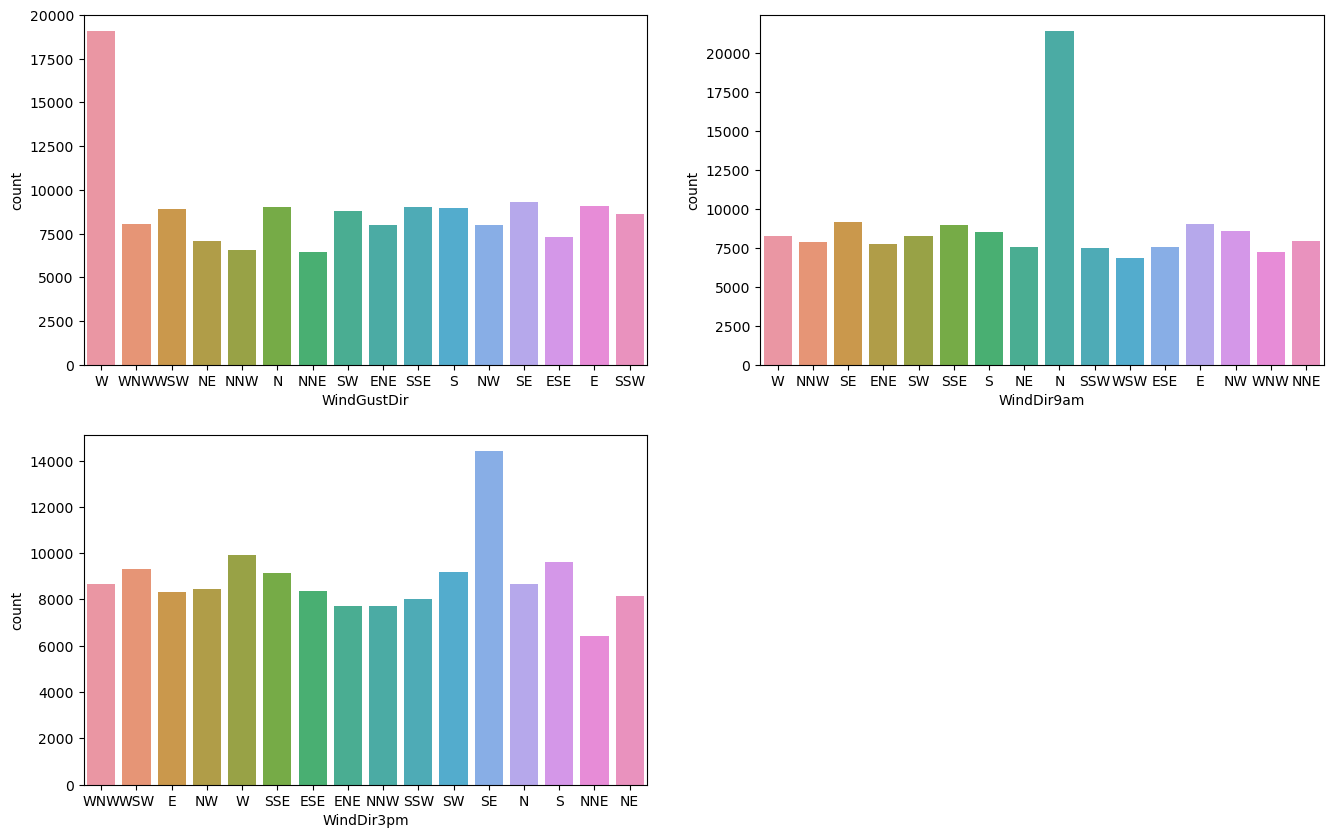

In [33]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.countplot(x='WindGustDir',data=df)
plt.subplot(2,2,2)
sns.countplot(x='WindDir9am',data=df)
plt.subplot(2,2,3)
sns.countplot(x='WindDir3pm',data=df)
plt.show()

### b) Numerical Data

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

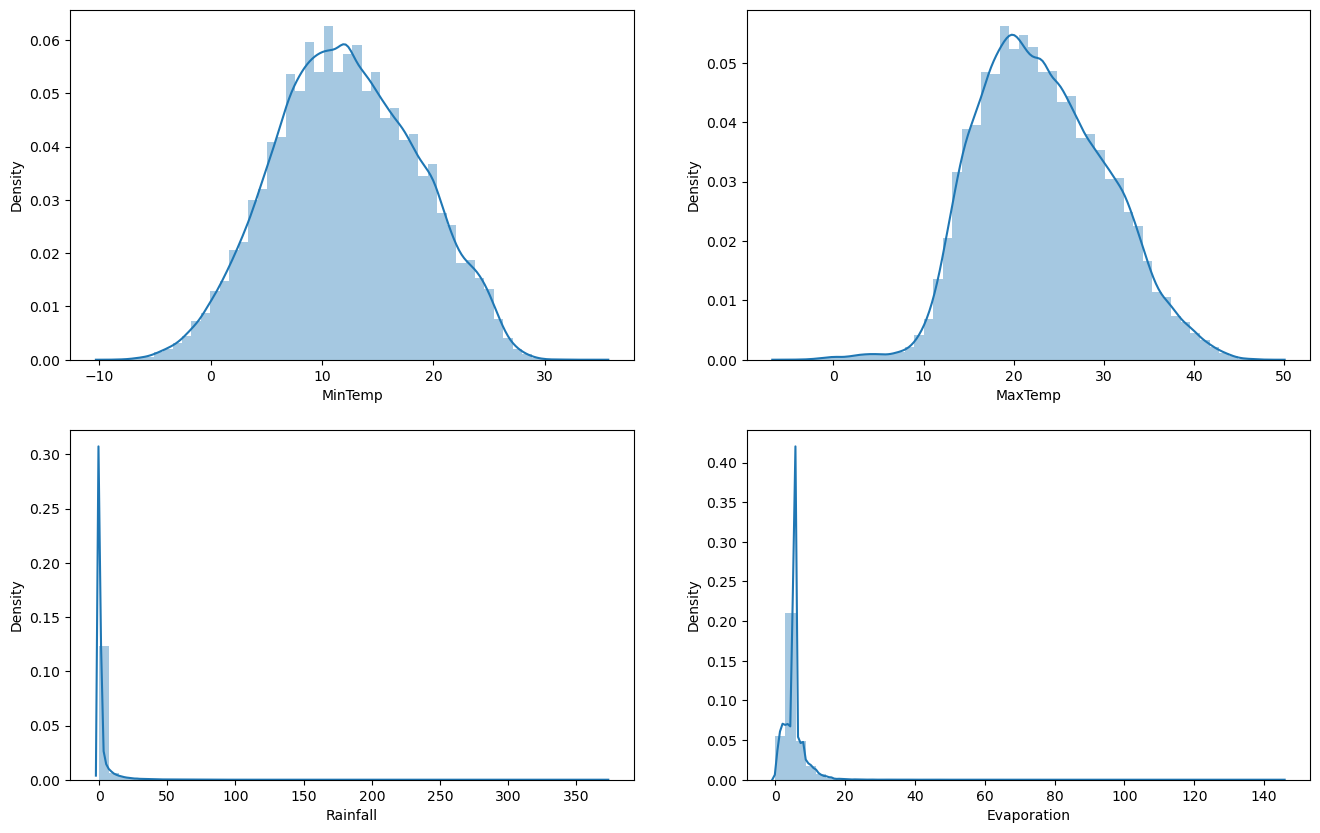

In [34]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.distplot(df['MinTemp'])
plt.subplot(2,2,2)
sns.distplot(df['MaxTemp'])
plt.subplot(2,2,3)
sns.distplot(df['Rainfall'])
plt.subplot(2,2,4)
sns.distplot(df['Evaporation'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

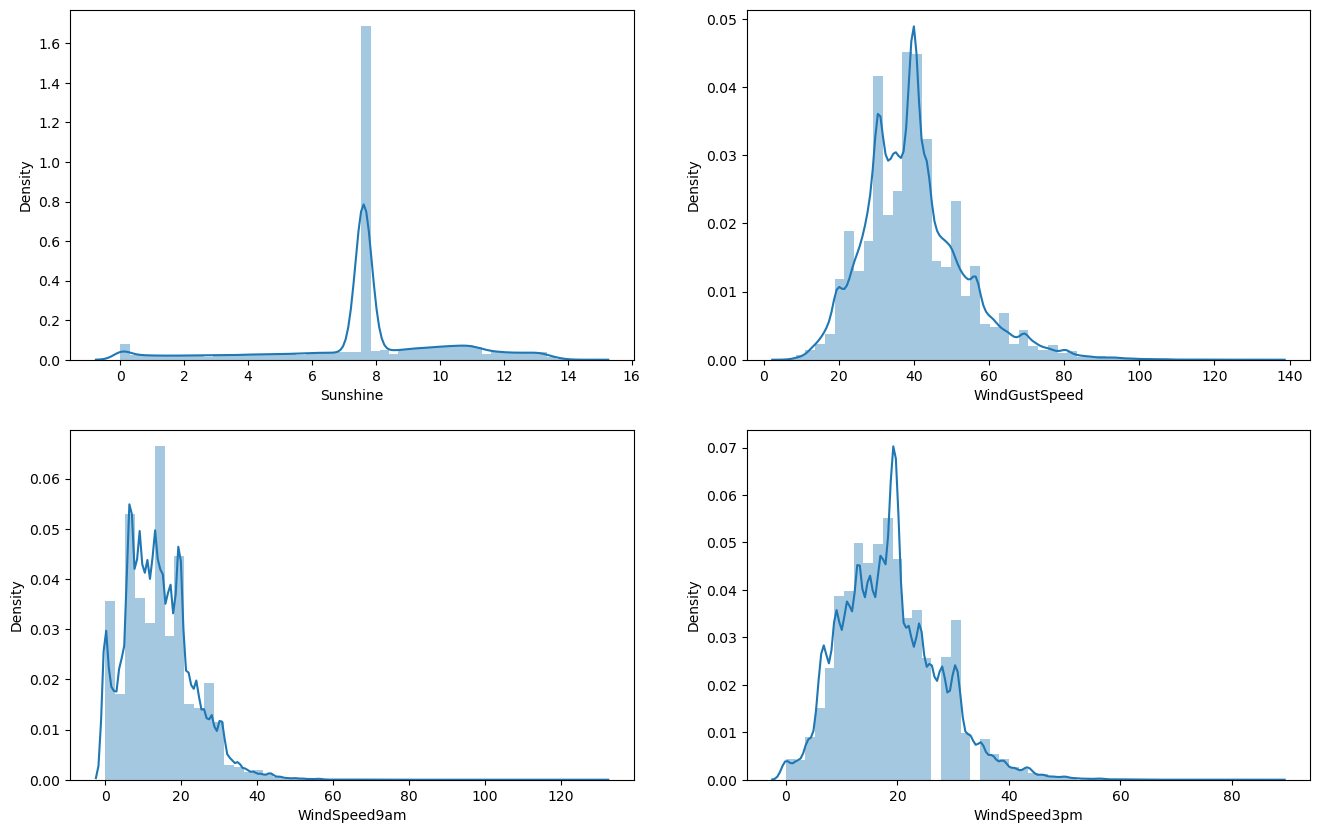

In [35]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.distplot(df['Sunshine'])
plt.subplot(2,2,2)
sns.distplot(df['WindGustSpeed'])
plt.subplot(2,2,3)
sns.distplot(df['WindSpeed9am'])
plt.subplot(2,2,4)
sns.distplot(df['WindSpeed3pm'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

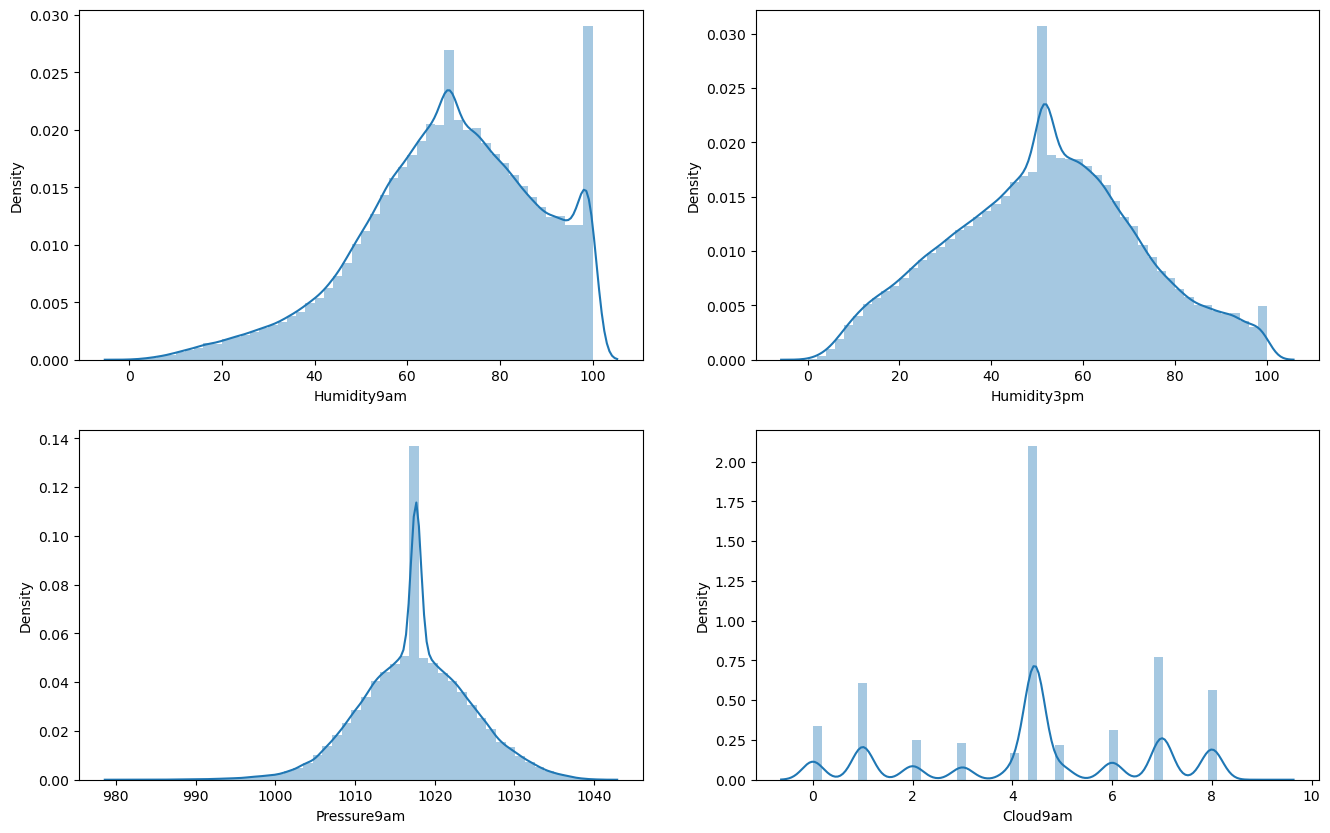

In [36]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.distplot(df['Humidity9am'])
plt.subplot(2,2,2)
sns.distplot(df['Humidity3pm'])
plt.subplot(2,2,3)
sns.distplot(df['Pressure9am'])
plt.subplot(2,2,4)
sns.distplot(df['Cloud9am'])

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

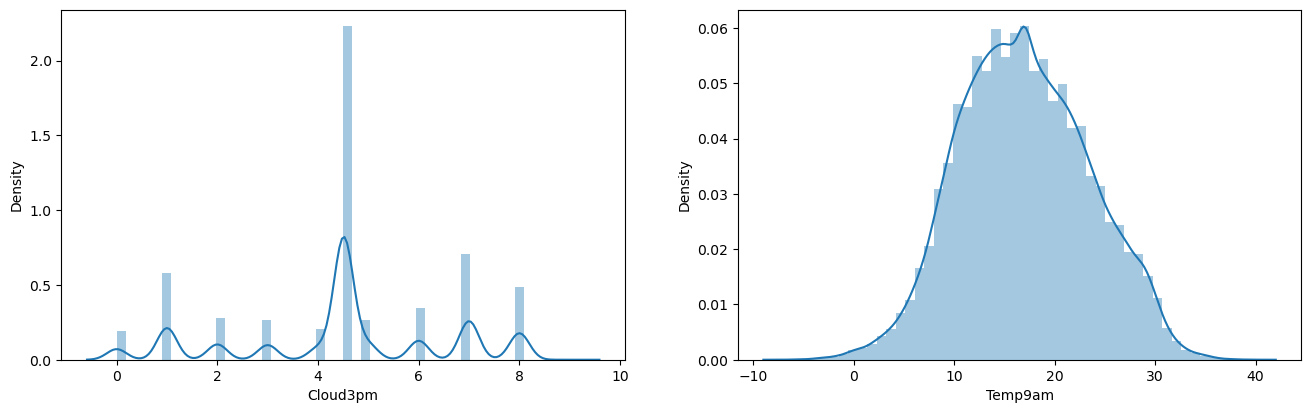

In [37]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.distplot(df['Cloud3pm'])
plt.subplot(2,2,2)
sns.distplot(df['Temp9am'])

### 3.2 Bivariate Analysis and Multivariate Analysis :- 


* When we perform analysis on two columns it is known as bivariate analysis.


* When we perform analysis on mutliple columns it is known as multivariate analysis.

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

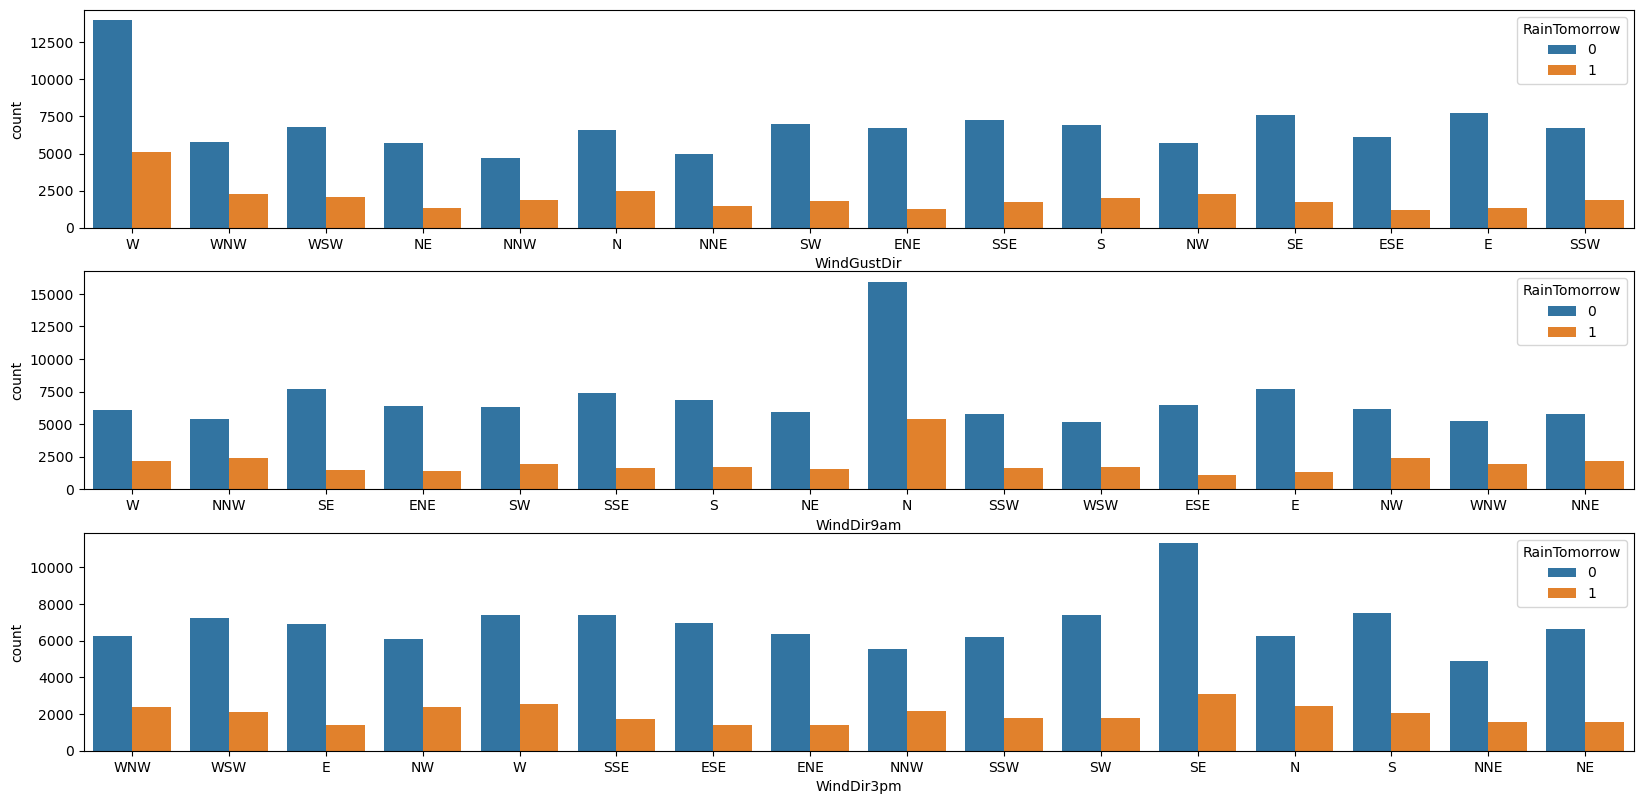

In [38]:
plt.figure(figsize=(20, 30))
plt.subplot(9,1,1)
sns.countplot(x = 'WindGustDir', hue = 'RainTomorrow', data = df)
plt.subplot(9,1,2)
sns.countplot(x = 'WindDir9am', hue = 'RainTomorrow', data = df)
plt.subplot(9,1,3)
sns.countplot(x = 'WindDir3pm', hue = 'RainTomorrow', data = df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

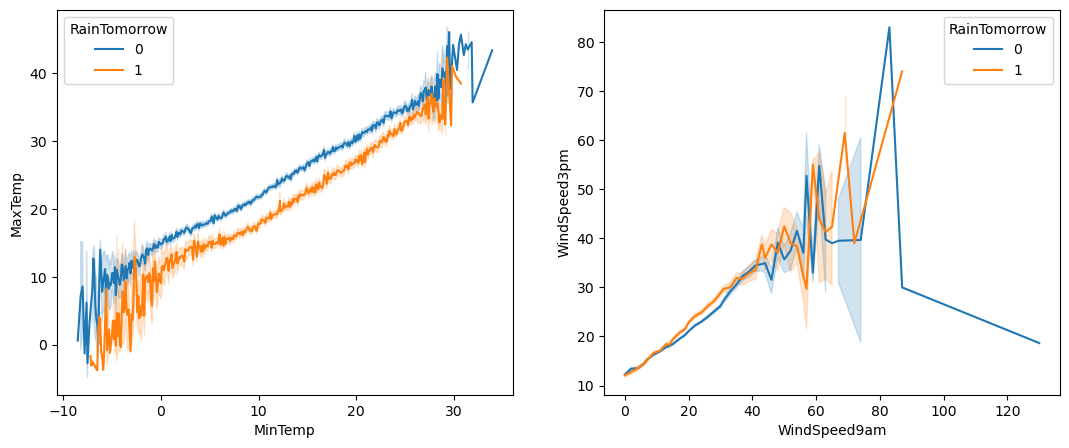

In [39]:
plt.figure(figsize = (20, 5))
plt.subplot(1,3,1)
sns.lineplot(x=df['MinTemp'],y=df['MaxTemp'],hue=df['RainTomorrow'])
plt.subplot(1,3,2)
sns.lineplot(x=df['WindSpeed9am'],y=df['WindSpeed3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

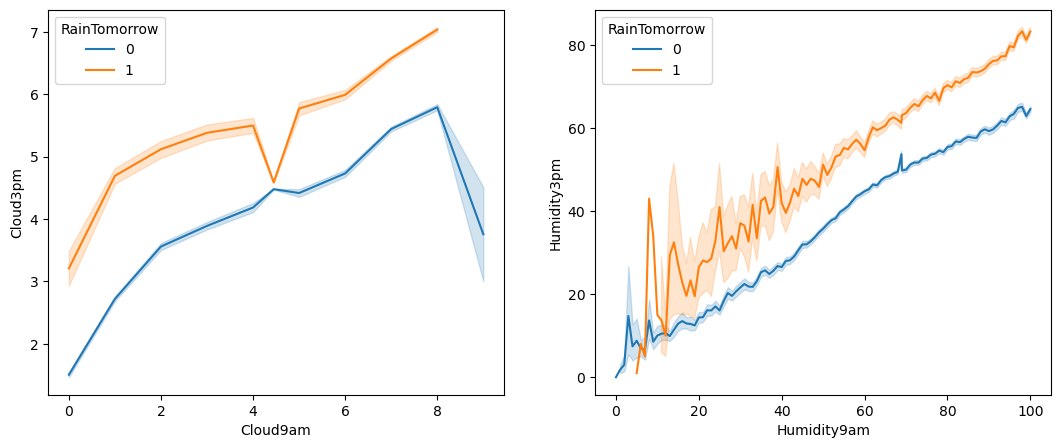

In [40]:
plt.figure(figsize = (20, 5))
plt.subplot(1,3,1)
sns.lineplot(x=df['Cloud9am'],y=df['Cloud3pm'],hue=df['RainTomorrow'])
plt.subplot(1,3,2)
sns.lineplot(x=df['Humidity9am'],y=df['Humidity3pm'],hue=df['RainTomorrow'])

## 3.3 Detect and Remove Outliers

<AxesSubplot:ylabel='Rainfall'>

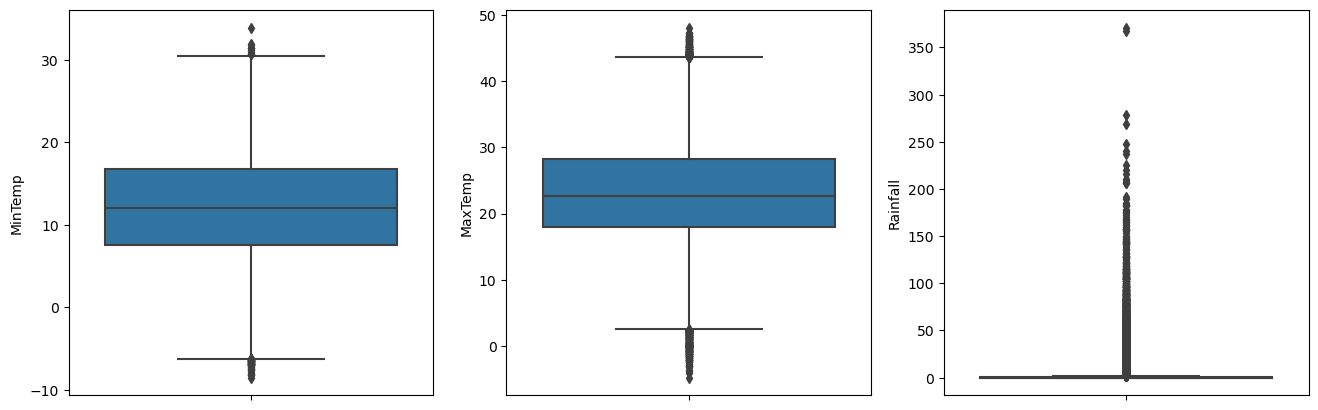

In [41]:
plt.figure(figsize = (16, 5))
plt.subplot(1,3,1)
sns.boxplot(y='MinTemp',data=df)
plt.subplot(1,3,2)
sns.boxplot(y='MaxTemp',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='Rainfall',data=df)

<AxesSubplot:ylabel='WindGustSpeed'>

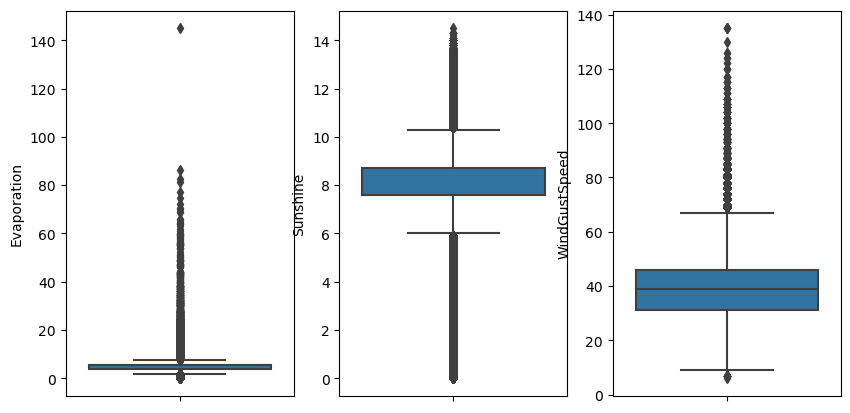

In [42]:
plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
sns.boxplot(y='Evaporation',data=df)
plt.subplot(1,3,2)
sns.boxplot(y='Sunshine',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='WindGustSpeed',data=df)

<AxesSubplot:ylabel='Humidity9am'>

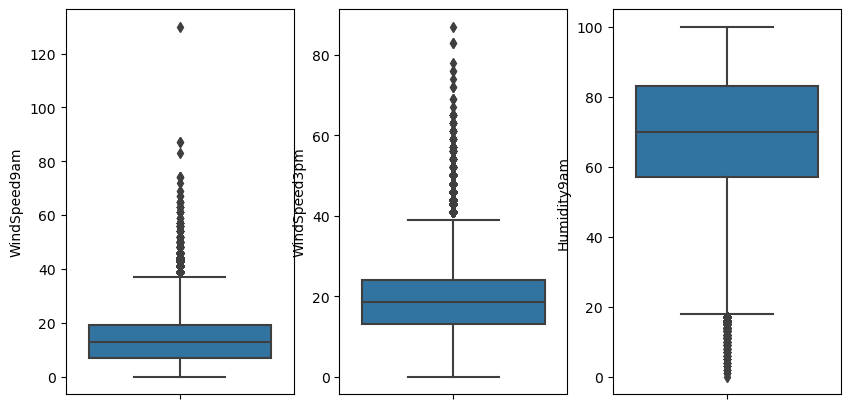

In [43]:
plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
sns.boxplot(y='WindSpeed9am',data=df)
plt.subplot(1,3,2)
sns.boxplot(y='WindSpeed3pm',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='Humidity9am',data=df)

<AxesSubplot:ylabel='Cloud9am'>

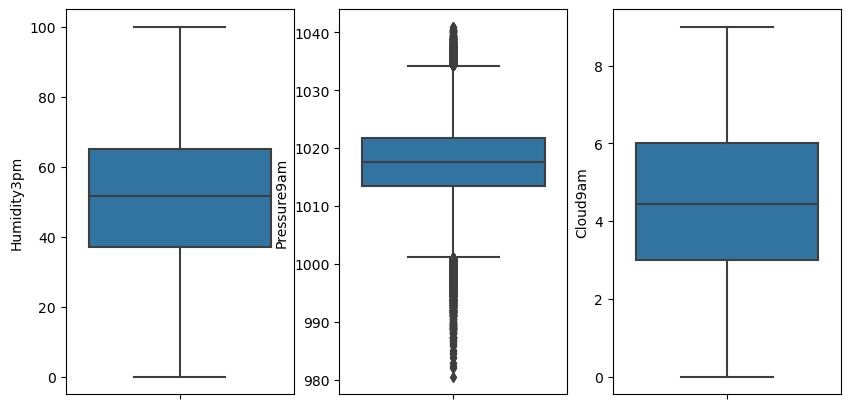

In [44]:
plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
sns.boxplot(y='Humidity3pm',data=df)
plt.subplot(1,3,2)
sns.boxplot(y='Pressure9am',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='Cloud9am',data=df)

<AxesSubplot:ylabel='Temp9am'>

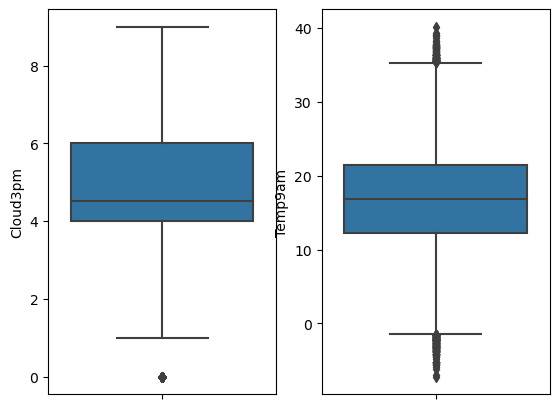

In [45]:
plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
sns.boxplot(y='Cloud3pm',data=df)
plt.subplot(1,3,2)
sns.boxplot(y='Temp9am',data=df)


In [46]:
df = df.drop(index = df[(df['MinTemp'] > 32)].index)
df = df.drop(index = df[(df['Rainfall'] > 200)].index)
df = df.drop(index = df[(df['Evaporation'] > 85)].index)
df = df.drop(index = df[(df['WindGustSpeed'] > 125)].index)
df = df.drop(index = df[(df['WindSpeed9am'] > 75)].index)
df = df.drop(index = df[(df['WindSpeed3pm'] > 75)].index)
df = df.drop(index = df[(df['Cloud3pm'] < 0)].index)

df.shape

(142118, 20)

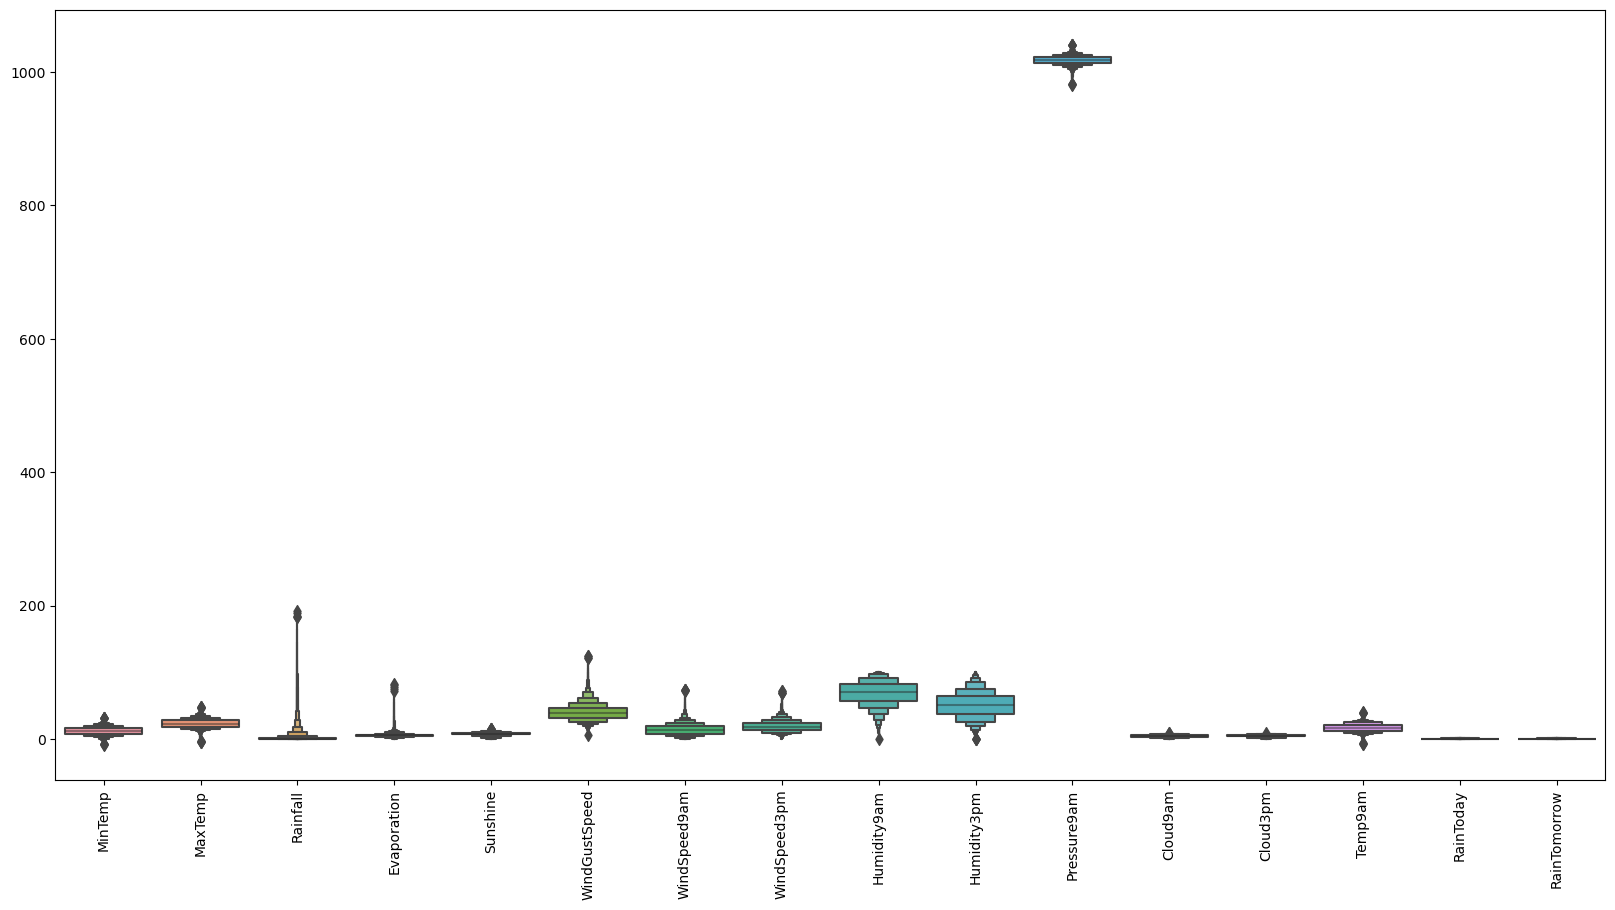

In [47]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

As you see all the outliers are removed.

# Step 4: Data Preparation

In [48]:
df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46824,7.611123,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.000000,4.50993,16.9,0,0
1,Albury,7.4,25.1,0.0,5.46824,7.611123,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,4.447461,4.50993,17.2,0,0


In [49]:
df.nunique()

Location          49
MinTemp          389
MaxTemp          506
Rainfall         665
Evaporation      355
Sunshine         146
WindGustDir       16
WindGustSpeed     65
WindDir9am        16
WindDir3pm        16
WindSpeed9am      41
WindSpeed3pm      40
Humidity9am      102
Humidity3pm      102
Pressure9am      547
Cloud9am          11
Cloud3pm          11
Temp9am          441
RainToday          2
RainTomorrow       2
dtype: int64

## 4.1 Convert Categorical Data into Numerical using Target Encoding

Target encoding can be used when there is a strong correlation between the categorical variable and the target variable. In rain prediction data, target encoding can be used to encode categorical variables such as the location of the rain (urban, rural, coastal) or the time of the day (morning, afternoon, evening).

In [50]:
cols_to_encode=['Location','WindGustDir','WindDir9am','WindDir3pm']

In [51]:
# Compute the target encoding for each category in each column

for col in cols_to_encode:
    target_means = df.groupby(col)['RainTomorrow'].mean()
    df[col + '_encoded'] = df[col].map(target_means)

In [52]:
df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded
0,13.4,22.9,0.6,5.46824,7.611123,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,4.50993,16.9,0,0,0.205247,0.265953,0.261138,0.277046
1,7.4,25.1,0.0,5.46824,7.611123,44.0,4.0,22.0,44.0,25.0,1010.6,4.447461,4.50993,17.2,0,0,0.205247,0.281994,0.309861,0.224295
2,12.9,25.7,0.0,5.46824,7.611123,46.0,19.0,26.0,38.0,30.0,1007.6,4.447461,2.00000,21.0,0,0,0.205247,0.234184,0.261138,0.224295
3,9.2,28.0,0.0,5.46824,7.611123,24.0,11.0,9.0,45.0,16.0,1017.6,4.447461,4.50993,18.1,0,0,0.205247,0.186827,0.162646,0.171322
4,17.5,32.3,1.0,5.46824,7.611123,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.00000,17.8,0,0,0.205247,0.265953,0.176258,0.282693


In [53]:
df.shape

(142118, 20)

## 4.2 Rescalling the Features using Standard Scaler

### Why to standardize before fitting in a ML model?
Well, the idea is simple. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

In [54]:
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100,stratify=y)

In [56]:
X_train.shape, X_test.shape

((106588, 19), (35530, 19))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142118 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MinTemp              142118 non-null  float64
 1   MaxTemp              142118 non-null  float64
 2   Rainfall             142118 non-null  float64
 3   Evaporation          142118 non-null  float64
 4   Sunshine             142118 non-null  float64
 5   WindGustSpeed        142118 non-null  float64
 6   WindSpeed9am         142118 non-null  float64
 7   WindSpeed3pm         142118 non-null  float64
 8   Humidity9am          142118 non-null  float64
 9   Humidity3pm          142118 non-null  float64
 10  Pressure9am          142118 non-null  float64
 11  Cloud9am             142118 non-null  float64
 12  Cloud3pm             142118 non-null  float64
 13  Temp9am              142118 non-null  float64
 14  RainToday            142118 non-null  int64  
 15  RainTomorrow     

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

num_vars=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
          'Humidity3pm','Pressure9am','Cloud9am','Cloud3pm','Temp9am']

X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,RainToday,Location_encoded,WindGustDir_encoded,WindDir9am_encoded,WindDir3pm_encoded
110568,0.315014,-0.284078,-0.242289,-1.295888,-0.993763,0.003160,0.339715,-1.453407,-0.415819,1.534056,-0.720259,-1.073268,1.660169,-0.091103,0,0.299072,0.265953,0.197833,0.244645
77168,-0.326524,-0.832150,0.311841,-1.168304,-1.286493,-1.217299,-0.338926,-0.419323,1.539231,0.803344,1.251511,1.561430,1.660169,-0.848125,1,0.365487,0.283928,0.270755,0.277046
130100,0.299367,-0.424609,-0.292665,-0.211426,0.250340,-0.912855,-0.565139,-0.189526,0.693804,0.511059,-0.067944,1.122313,-1.191967,-0.245597,0,0.238469,0.185989,0.176258,0.213720
101206,-1.108888,-0.396503,-0.116351,-0.721761,1.384669,1.598811,1.923209,2.338235,0.006895,-0.950363,0.465768,-1.951501,-2.142680,-0.909922,1,0.303630,0.283928,0.254133,0.282592
60049,-0.874179,-0.354344,-0.191914,0.001716,-0.001729,-0.380077,-1.583100,0.155169,1.592071,0.705916,0.628847,1.561430,0.709457,-0.724529,0,0.185234,0.281994,0.254133,0.255096


In [59]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,106588.0,-1.456868e-16,1.000005,-3.236918,-0.717706,-0.029226,0.721844,3.084583
MaxTemp,106588.0,2.730133e-16,1.000005,-3.937892,-0.747831,-0.073281,0.699641,3.496214
Rainfall,106588.0,-7.301194e-16,1.000005,-0.292665,-0.292665,-0.292665,-0.191914,23.887560
Evaporation,106588.0,4.468390e-16,1.000005,-1.742431,-0.466593,0.001716,0.001716,24.539830
Sunshine,106588.0,9.014078e-16,1.000005,-2.786735,-0.001729,-0.001729,0.396705,2.445816
WindGustSpeed,106588.0,1.481152e-15,1.000005,-2.587298,-0.684522,-0.075633,0.457145,6.393809
WindSpeed9am,106588.0,2.841824e-16,1.000005,-1.583100,-0.791353,-0.112712,0.565928,6.786799
WindSpeed3pm,106588.0,-4.712157e-16,1.000005,-2.142796,-0.649119,0.001510,0.614762,6.129878
Humidity9am,106588.0,1.392643e-16,1.000005,-3.586170,-0.627175,0.059734,0.746644,1.644910
Humidity3pm,106588.0,3.814472e-16,1.000005,-2.509215,-0.706793,0.001467,0.657202,2.362195


## 4.3 Check the Correlation before making the model

<AxesSubplot:>

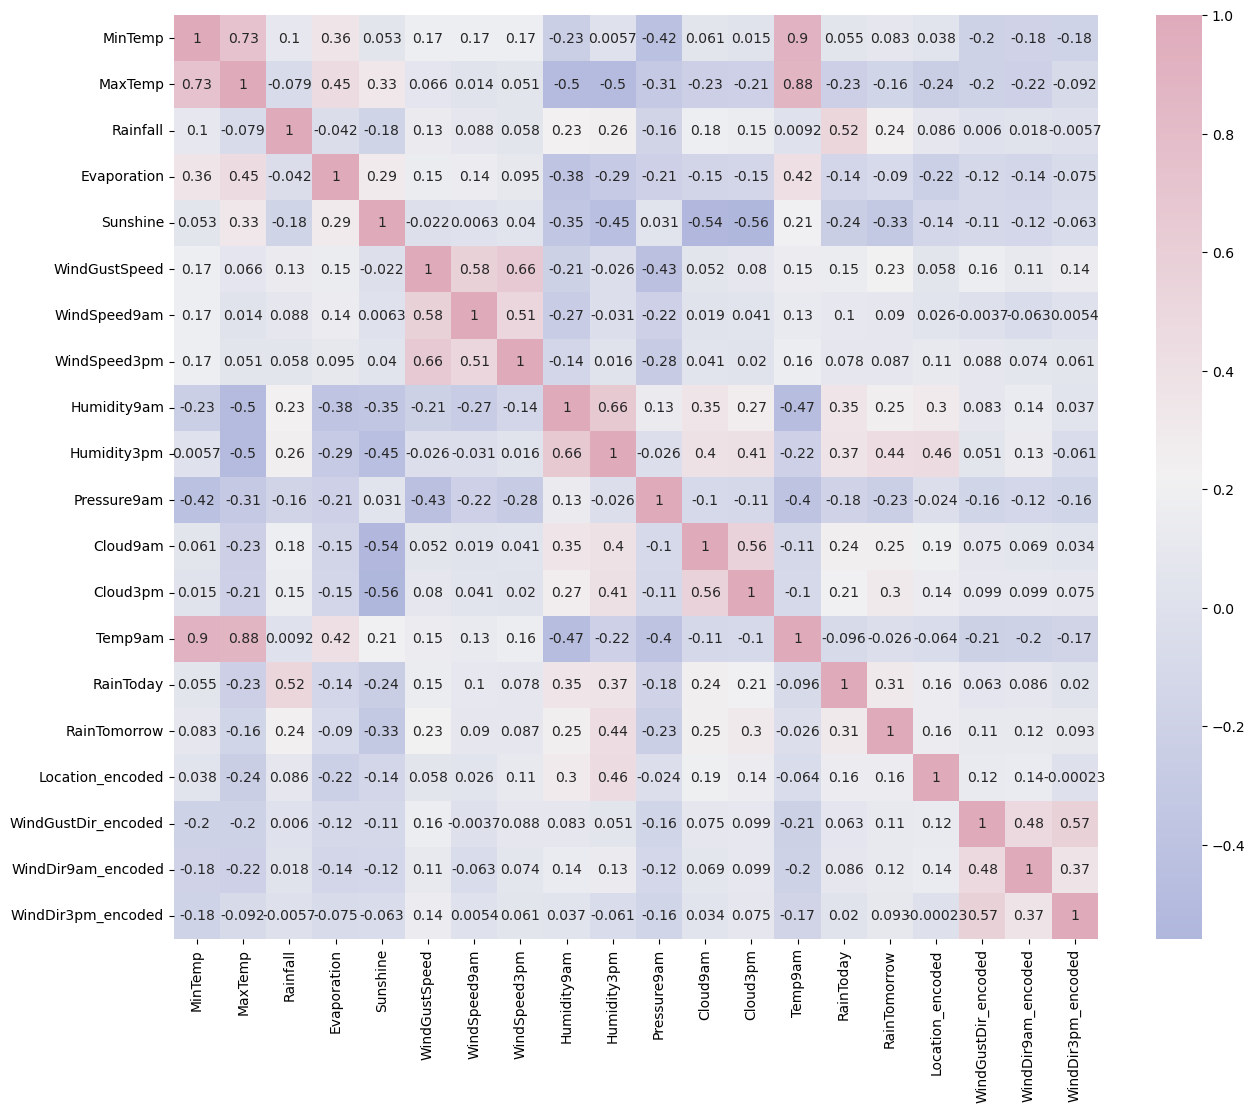

In [60]:
# Correlation amongst numeric attributes

corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

Their is no highly correlated features. All features having less than 90% of correlation so, I decided not to drop any of feature.

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106588 entries, 110568 to 79880
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MinTemp              106588 non-null  float64
 1   MaxTemp              106588 non-null  float64
 2   Rainfall             106588 non-null  float64
 3   Evaporation          106588 non-null  float64
 4   Sunshine             106588 non-null  float64
 5   WindGustSpeed        106588 non-null  float64
 6   WindSpeed9am         106588 non-null  float64
 7   WindSpeed3pm         106588 non-null  float64
 8   Humidity9am          106588 non-null  float64
 9   Humidity3pm          106588 non-null  float64
 10  Pressure9am          106588 non-null  float64
 11  Cloud9am             106588 non-null  float64
 12  Cloud3pm             106588 non-null  float64
 13  Temp9am              106588 non-null  float64
 14  RainToday            106588 non-null  int64  
 15  Location_enco

# Step 5: Building our Model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (Recursive feature elimination)

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [63]:
# accuracy score on trainning data

model.score(X_train,y_train)

0.8412297819641986

In [64]:
from sklearn.feature_selection import RFE

rfe=RFE(model,n_features_to_select=15)

rfe=rfe.fit(X_train,y_train)

In [65]:

rfe_ranking = pd.DataFrame({'features' : X_train.columns,'rank' : rfe.ranking_, 'support': rfe.support_ }).sort_values(by='rank',ascending=True)
rfe_ranking

,features,rank,support
9,Humidity3pm,1,True
16,WindGustDir_encoded,1,True
15,Location_encoded,1,True
14,RainToday,1,True
13,Temp9am,1,True
12,Cloud3pm,1,True
10,Pressure9am,1,True
17,WindDir9am_encoded,1,True
18,WindDir3pm_encoded,1,True
7,WindSpeed3pm,1,True


* X_train.columns :- Features of training data
* rfe.ranking_ :- Important Features rank wise 
* rfe.support_ :- Whether the feature is important or not (i.e: True/False) 

In [66]:
# Select only those features which are important

col=X_train.columns[rfe.support_]
col

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'Temp9am',
       'RainToday', 'Location_encoded', 'WindGustDir_encoded',
       'WindDir9am_encoded', 'WindDir3pm_encoded'],
      dtype='object')

In [67]:
# These are the columns which are not important for model

X_train.columns[~rfe.support_]

Index(['MinTemp', 'Rainfall', 'Evaporation', 'Cloud9am'], dtype='object')

# 5.1 Building model using statsmodel for the detailed statistics

## Model 1

In [68]:
import statsmodels.api as sm


#Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               106588
Model:                            GLM   Df Residuals:                   106572
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39027.
Date:                Wed, 22 Mar 2023   Deviance:                       78054.
Time:                        12:26:41   Pearson chi2:                 1.03e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.1666      0.076    -41.477      0.000      -3.316      -3.017
MaxTemp                 0.0883      0.030      2.972      0.003       0.030       0.147
Sunshine               -0.3270      0.011    -30.017      0.000      -0.348      -0.306
WindGustSpeed           0.6514      0.013     49.276      0.000       0.626       0.677
WindSpeed9am           -0.0981      0.012     -8.252      0.000      -0.121      -0.075
WindSpeed3pm           -0.2032      0.012    -16.967      0.000      -0.227      -0.180
Humidity9am             0.1047      0.016      6.594      0.000       0.074       0.136
Humidity3pm             1.1178      0.017     65.033      0.000       1.084       1.152
Pressure9am            -0.2947      0.011    -26.995      0.000      -0.316      -0.273
Cloud3pm                0.2372      0.012     19.785      0.000       0.214       0.261
Temp9am                 0.1230      0.028      4.321      0.000       0.067       0.179
RainToday               0.4936      0.021     23.230      0.000       0.452       0.535
Location_encoded       -0.7840      0.164     -4.782      0.000      -1.105      -0.463
WindGustDir_encoded     0.0352      0.281      0.125      0.900      -0.516       0.586
WindDir9am_encoded      1.0731      0.232      4.618      0.000       0.618       1.529
WindDir3pm_encoded      5.1989      0.303     17.144      0.000       4.605       5.793
=======================================================================================
"""

In [69]:
# prediction on trainnin data

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

110568    0.715585
77168     0.362141
130100    0.089816
101206    0.043589
60049     0.267401
67874     0.105660
94646     0.064442
54077     0.179539
18451     0.204783
44178     0.125654
dtype: float64

In [70]:
# To add these predictions in a data frame Convert these predictions to numpy array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71558545, 0.36214069, 0.08981649, 0.04358886, 0.26740057,
       0.10565971, 0.06444193, 0.17953855, 0.20478305, 0.12565409])

In [71]:
y_train_pred_final = pd.DataFrame({'RainTomorrow':y_train.values, 'Rain_Tomorrow_Prob':y_train_pred})
y_train_pred_final['Location'] = y_train.index
y_train_pred_final.sample(15)

,RainTomorrow,Rain_Tomorrow_Prob,Location
96760,0,0.074840,66893
65571,0,0.045639,35031
76887,0,0.052410,133211
93727,0,0.017873,106204
74625,0,0.147468,17894
54973,0,0.652235,141856
34634,0,0.017003,12649
64960,0,0.106814,41144
65479,0,0.199266,135506
1868,0,0.513050,58243


In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Rain_Tomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(10)

,RainTomorrow,Rain_Tomorrow_Prob,Location,predicted
96460,1,0.787286,104464,1
100325,0,0.370504,59972,0
79688,1,0.648912,21999,1
99099,0,0.013122,39095,0
51762,1,0.405380,76465,0
105448,0,0.011179,7837,0
42284,1,0.321360,133112,0
68195,0,0.072602,85558,0
86650,0,0.092251,134352,0
23430,0,0.090270,73581,0


Checking VIFs

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train[col].shape[1]

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,WindGustDir_encoded,45.75
14,WindDir3pm_encoded,44.02
13,WindDir9am_encoded,28.98
11,Location_encoded,14.13
0,MaxTemp,10.46
9,Temp9am,9.83
6,Humidity3pm,4.09
5,Humidity9am,3.00
2,WindGustSpeed,2.39
4,WindSpeed3pm,1.93


'WindGustDir_encoded', 'WindDir3pm_encoded', 'WindDir9am_encoded', 'Location_encoded' these features are having more VIF values. So, drop them one by one. 

In [74]:
col = col.drop('WindGustDir_encoded')
col

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'Temp9am',
       'RainToday', 'Location_encoded', 'WindDir9am_encoded',
       'WindDir3pm_encoded'],
      dtype='object')

# Model 2

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               106588
Model:                            GLM   Df Residuals:                   106573
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39027.
Date:                Wed, 22 Mar 2023   Deviance:                       78054.
Time:                        12:26:46   Pearson chi2:                 1.03e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1648      0.075    -42.218      0.000      -3.312      -3.018
MaxTemp                0.0882      0.030      2.969      0.003       0.030       0.146
Sunshine              -0.3270      0.011    -30.018      0.000      -0.348      -0.306
WindGustSpeed          0.6516      0.013     49.418      0.000       0.626       0.677
WindSpeed9am          -0.0981      0.012     -8.265      0.000      -0.121      -0.075
WindSpeed3pm          -0.2033      0.012    -16.977      0.000      -0.227      -0.180
Humidity9am            0.1047      0.016      6.593      0.000       0.074       0.136
Humidity3pm            1.1178      0.017     65.057      0.000       1.084       1.151
Pressure9am           -0.2949      0.011    -27.097      0.000      -0.316      -0.274
Cloud3pm               0.2373      0.012     19.789      0.000       0.214       0.261
Temp9am                0.1229      0.028      4.319      0.000       0.067       0.179
RainToday              0.4936      0.021     23.230      0.000       0.452       0.535
Location_encoded      -0.7822      0.163     -4.789      0.000      -1.102      -0.462
WindDir9am_encoded     1.0820      0.221      4.888      0.000       0.648       1.516
WindDir3pm_encoded     5.2156      0.272     19.146      0.000       4.682       5.750
======================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [77]:
y_train_pred[:10]

array([0.71536911, 0.36198146, 0.08987711, 0.04356091, 0.26714931,
       0.10555764, 0.06449922, 0.17967861, 0.20471233, 0.1254999 ])

In [78]:
y_train_pred_final['Rain_Tomorrow_Prob'] = y_train_pred

In [79]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Rain_Tomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(10)

,RainTomorrow,Rain_Tomorrow_Prob,Location,predicted
62348,0,0.037216,38878,0
100065,0,0.353165,108647,0
60395,0,0.523806,89725,1
55437,0,0.152667,13443,0
78454,1,0.298703,81978,0
56405,0,0.085306,118044,0
89631,0,0.329512,78254,0
28182,0,0.045866,9550,0
86346,0,0.004291,137027,0
34610,1,0.121884,10954,0


In [80]:
# Let's check the accuracy on trainning data.

from sklearn import metrics

print(metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.predicted))

0.8410796712575525


In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,WindDir3pm_encoded,27.52
12,WindDir9am_encoded,24.97
11,Location_encoded,13.68
0,MaxTemp,10.45
9,Temp9am,9.83
6,Humidity3pm,4.08
5,Humidity9am,3.00
2,WindGustSpeed,2.38
4,WindSpeed3pm,1.93
3,WindSpeed9am,1.74


In [82]:
col = col.drop('WindDir3pm_encoded')
col

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'Temp9am',
       'RainToday', 'Location_encoded', 'WindDir9am_encoded'],
      dtype='object')

In [83]:
X_train_sm.columns

Index(['const', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm',
       'Temp9am', 'RainToday', 'Location_encoded', 'WindDir9am_encoded',
       'WindDir3pm_encoded'],
      dtype='object')

# Model 3

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               106588
Model:                            GLM   Df Residuals:                   106574
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39211.
Date:                Wed, 22 Mar 2023   Deviance:                       78422.
Time:                        12:26:50   Pearson chi2:                 1.03e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2800
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3225      0.060    -38.553      0.000      -2.441      -2.204
MaxTemp                0.1259      0.030      4.254      0.000       0.068       0.184
Sunshine              -0.3255      0.011    -29.970      0.000      -0.347      -0.304
WindGustSpeed          0.6633      0.013     50.433      0.000       0.638       0.689
WindSpeed9am          -0.0950      0.012     -8.018      0.000      -0.118      -0.072
WindSpeed3pm          -0.2058      0.012    -17.228      0.000      -0.229      -0.182
Humidity9am            0.1087      0.016      6.863      0.000       0.078       0.140
Humidity3pm            1.0961      0.017     64.206      0.000       1.063       1.130
Pressure9am           -0.3291      0.011    -30.700      0.000      -0.350      -0.308
Cloud3pm               0.2476      0.012     20.714      0.000       0.224       0.271
Temp9am                0.0516      0.028      1.831      0.067      -0.004       0.107
RainToday              0.4794      0.021     22.660      0.000       0.438       0.521
Location_encoded      -0.7631      0.163     -4.685      0.000      -1.082      -0.444
WindDir9am_encoded     2.5603      0.207     12.343      0.000       2.154       2.967
======================================================================================
"""

In [85]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [86]:
y_train_pred[:10]

array([0.68827889, 0.30992556, 0.08700446, 0.03557563, 0.24735805,
       0.1139995 , 0.0686786 , 0.1875261 , 0.23572302, 0.1166834 ])

In [87]:
y_train_pred_final['Rain_Tomorrow_Prob'] = y_train_pred

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Rain_Tomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(5)

,RainTomorrow,Rain_Tomorrow_Prob,Location,predicted
10123,0,0.014610,120775,0
63392,0,0.148037,95722,0
96432,0,0.069883,7955,0
71490,0,0.007078,38508,0
42068,1,0.952931,19015,1


In [89]:
# accuracy on trainning data

print(metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.predicted))

0.8398506398468871


In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,WindDir9am_encoded,11.47
11,Location_encoded,11.43
0,MaxTemp,10.23
9,Temp9am,9.61
6,Humidity3pm,4.02
5,Humidity9am,3.00
2,WindGustSpeed,2.38
4,WindSpeed3pm,1.93
3,WindSpeed9am,1.73
10,RainToday,1.67


In [91]:
col = col.drop('WindDir9am_encoded')
col

Index(['MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'Temp9am',
       'RainToday', 'Location_encoded'],
      dtype='object')

In [92]:
X_train_sm.columns

Index(['const', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm',
       'Temp9am', 'RainToday', 'Location_encoded', 'WindDir9am_encoded'],
      dtype='object')

# Model 4

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               106588
Model:                            GLM   Df Residuals:                   106575
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39287.
Date:                Wed, 22 Mar 2023   Deviance:                       78575.
Time:                        12:26:53   Pearson chi2:                 1.03e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2789
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7622      0.039    -45.037      0.000      -1.839      -1.686
MaxTemp              0.1218      0.030      4.124      0.000       0.064       0.180
Sunshine            -0.3270      0.011    -30.128      0.000      -0.348      -0.306
WindGustSpeed        0.6779      0.013     51.703      0.000       0.652       0.704
WindSpeed9am        -0.1148      0.012     -9.774      0.000      -0.138      -0.092
WindSpeed3pm        -0.2017      0.012    -16.884      0.000      -0.225      -0.178
Humidity9am          0.1031      0.016      6.514      0.000       0.072       0.134
Humidity3pm          1.0949      0.017     64.127      0.000       1.061       1.128
Pressure9am         -0.3524      0.011    -33.342      0.000      -0.373      -0.332
Cloud3pm             0.2462      0.012     20.645      0.000       0.223       0.270
Temp9am              0.0197      0.028      0.704      0.482      -0.035       0.075
RainToday            0.4767      0.021     22.537      0.000       0.435       0.518
Location_encoded    -0.6549      0.162     -4.039      0.000      -0.973      -0.337
====================================================================================
"""

In [94]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.70805606, 0.28535981, 0.09876531, 0.03411595, 0.23912077,
       0.10171514, 0.07170292, 0.23071363, 0.22510807, 0.12634677])

In [95]:
y_train_pred_final['Rain_Tomorrow_Prob'] = y_train_pred

In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.Rain_Tomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(5)

,RainTomorrow,Rain_Tomorrow_Prob,Location,predicted
13090,0,0.473749,66980,0
104178,1,0.243922,97743,0
41486,1,0.965009,116820,1
17408,0,0.188499,78817,0
74146,0,0.195079,41702,0


In [97]:
print(metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.predicted))

0.8402352985326679


In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,MaxTemp,10.17
9,Temp9am,9.41
6,Humidity3pm,3.93
5,Humidity9am,2.97
2,WindGustSpeed,2.38
4,WindSpeed3pm,1.93
3,WindSpeed9am,1.71
1,Sunshine,1.64
10,RainToday,1.64
8,Cloud3pm,1.55


In [99]:
col = col.drop('MaxTemp')
col

Index(['Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm', 'Temp9am',
       'RainToday', 'Location_encoded'],
      dtype='object')

In [100]:
X_train_sm.columns

Index(['const', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud3pm',
       'Temp9am', 'RainToday', 'Location_encoded'],
      dtype='object')

# Model 5

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               106588
Model:                            GLM   Df Residuals:                   106576
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39296.
Date:                Wed, 22 Mar 2023   Deviance:                       78592.
Time:                        12:26:56   Pearson chi2:                 1.04e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2788
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7403      0.039    -44.920      0.000      -1.816      -1.664
Sunshine            -0.3225      0.011    -29.892      0.000      -0.344      -0.301
WindGustSpeed        0.6810      0.013     52.008      0.000       0.655       0.707
WindSpeed9am        -0.1217      0.012    -10.463      0.000      -0.145      -0.099
WindSpeed3pm        -0.2058      0.012    -17.283      0.000      -0.229      -0.182
Humidity9am          0.1243      0.015      8.303      0.000       0.095       0.154
Humidity3pm          1.0553      0.014     74.957      0.000       1.028       1.083
Pressure9am         -0.3530      0.011    -33.434      0.000      -0.374      -0.332
Cloud3pm             0.2467      0.012     20.694      0.000       0.223       0.270
Temp9am              0.1263      0.011     11.837      0.000       0.105       0.147
RainToday            0.4619      0.021     22.180      0.000       0.421       0.503
Location_encoded    -0.7529      0.160     -4.695      0.000      -1.067      -0.439
====================================================================================
"""

In [102]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.69728707, 0.28080968, 0.10064754, 0.03260588, 0.23631345,
       0.10532954, 0.07356642, 0.23659566, 0.22417398, 0.12887548])

In [103]:
y_train_pred_final['Rain_Tomorrow_Prob'] = y_train_pred

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Rain_Tomorrow_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(5)

,RainTomorrow,Rain_Tomorrow_Prob,Location,predicted
70889,0,0.154409,95136,0
94250,0,0.051945,1473,0
87274,0,0.250336,11636,0
25747,1,0.611676,34987,1
81087,0,0.363464,45004,0


In [105]:
print(metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.predicted))

0.8401696250985101


In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity9am,2.57
1,WindGustSpeed,2.37
5,Humidity3pm,2.17
3,WindSpeed3pm,1.89
2,WindSpeed9am,1.69
0,Sunshine,1.63
9,RainToday,1.61
8,Temp9am,1.58
7,Cloud3pm,1.55
6,Pressure9am,1.50


All Features having good VIF Value. So, we proceed to next step.

# Step 6: Check the Assumptions of Logistic Regression Model

### 6.1) The dependent Variable is in  Binary Form (0,1) :- Logistic regression assumes that the dependent variable only takes on two possible outcomes.

In [107]:
y_train.value_counts()

0    82696
1    23892
Name: RainTomorrow, dtype: int64

### 6.2) There is No Multicollinearity Among Independent Variables :- Logistic regression assumes that there is no multicollinearity among the independent variables.

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity9am,2.57
1,WindGustSpeed,2.37
5,Humidity3pm,2.17
3,WindSpeed3pm,1.89
2,WindSpeed9am,1.69
0,Sunshine,1.63
9,RainToday,1.61
8,Temp9am,1.58
7,Cloud3pm,1.55
6,Pressure9am,1.50


### 6.3) Little or no Outliers: Logistic regression assumes that there are little or no influential outliers that may skew the results or bias the model.

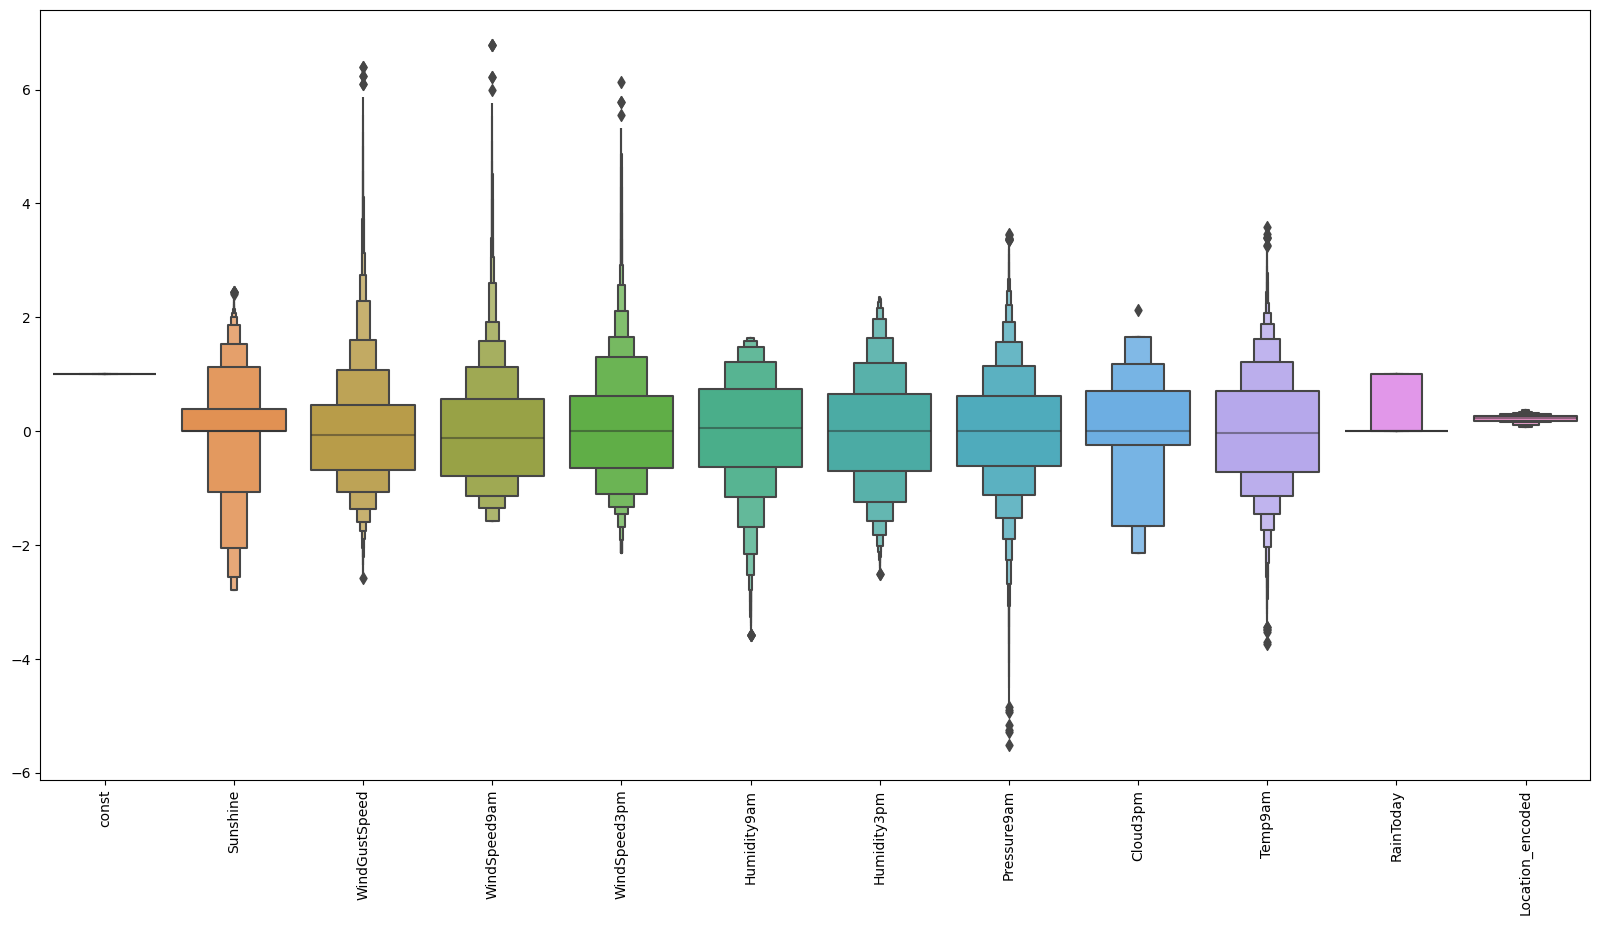

In [109]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train_sm)
plt.xticks(rotation=90)
plt.show()

### 6.4) The Sample Size is Sufficiently Large :- Logistic regression assumes that the sample size of the dataset if large enough to draw valid conclusions from the fitted logistic regression model.

In [110]:
X_train.shape, X_test.shape

((106588, 19), (35530, 19))

75% is our trainning data.

### 6.5) Independence of observations: Each observation in the data should be independent of all other observations. This means that the value of the dependent variable for one observation should not depend on the value of the dependent variable for any other observation.

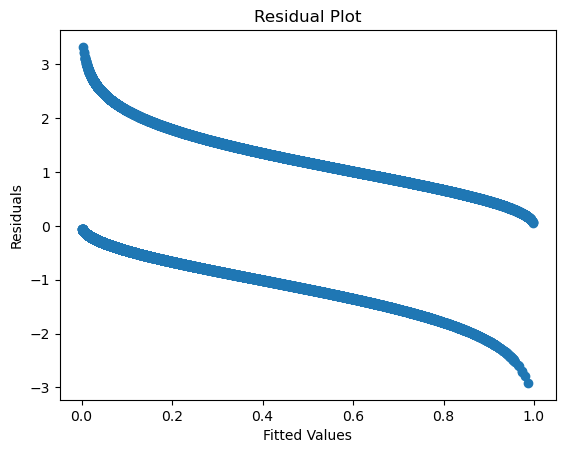

No autocorrelation


In [111]:
from statsmodels.stats.stattools import durbin_watson

# Plot the residuals

residuals = res.resid_deviance
fitted_values = res.fittedvalues
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Calculate the Durbin-Watson test statistic

dw = durbin_watson(residuals)

if dw < 1.5:
    print("Positive autocorrelation")
elif dw > 2.5:
    print("Negative autocorrelation")
else:
    print("No autocorrelation")


### 6.6) Linearity of independent variables and log odds: Logistic regression assumes that the relationship between the independent variables and the log odds of the dependent variable is linear.

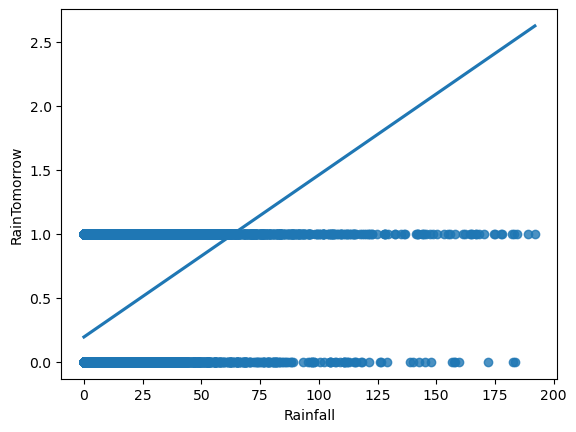

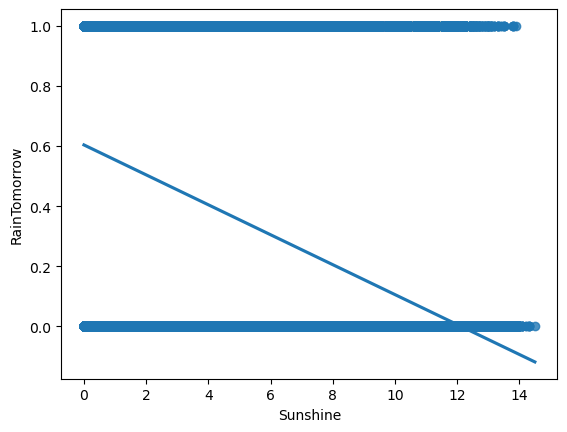

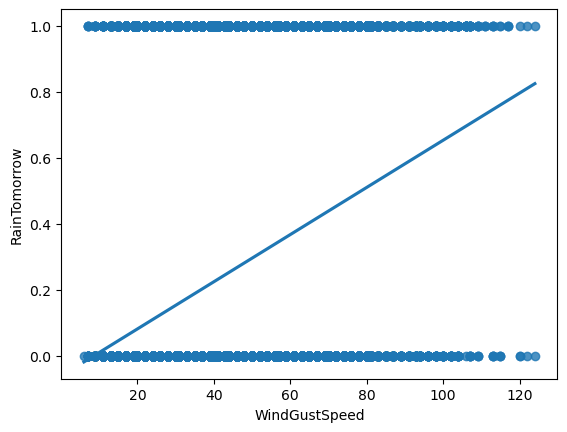

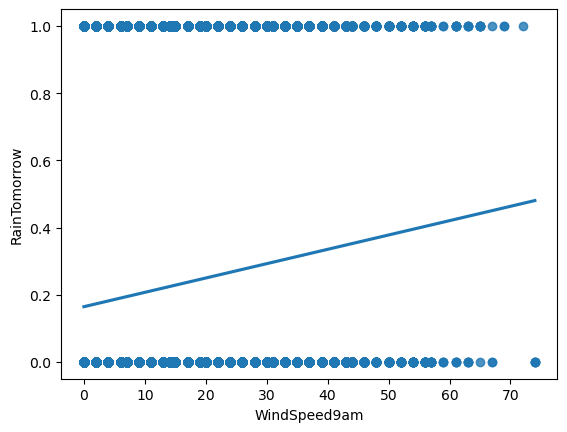

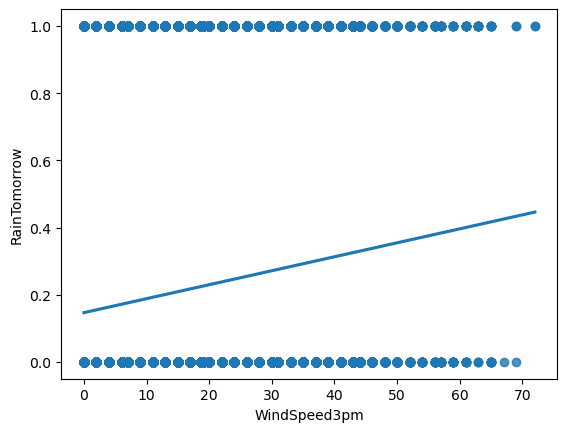

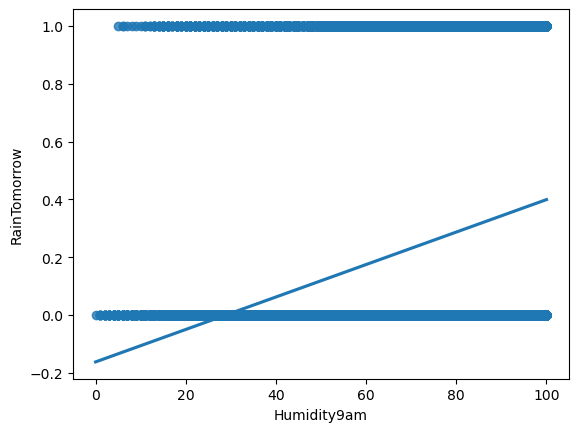

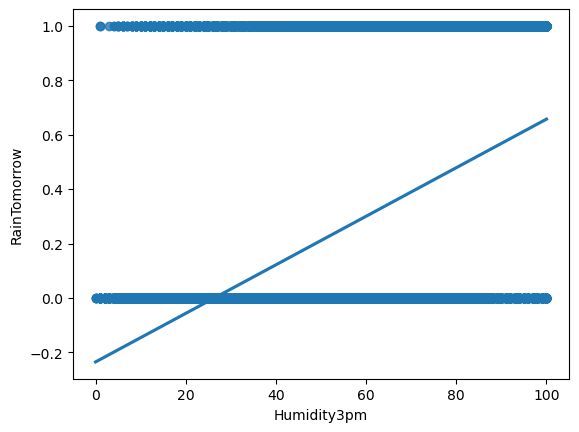

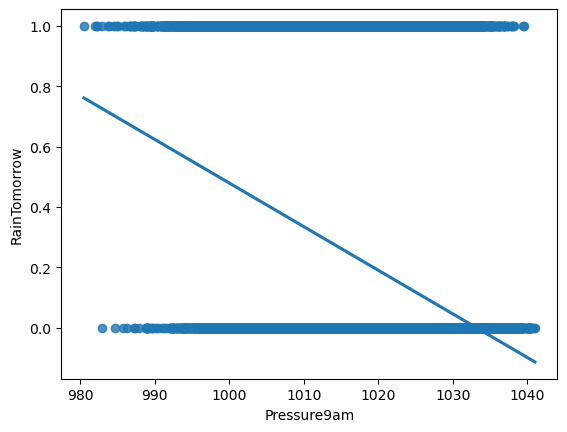

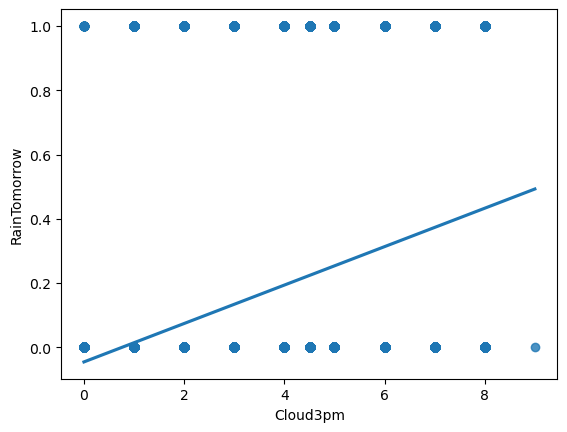

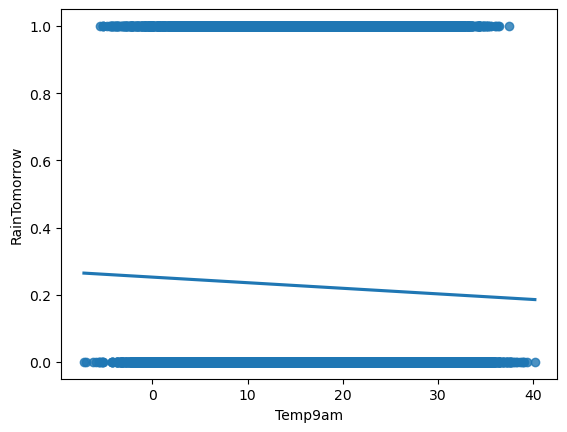

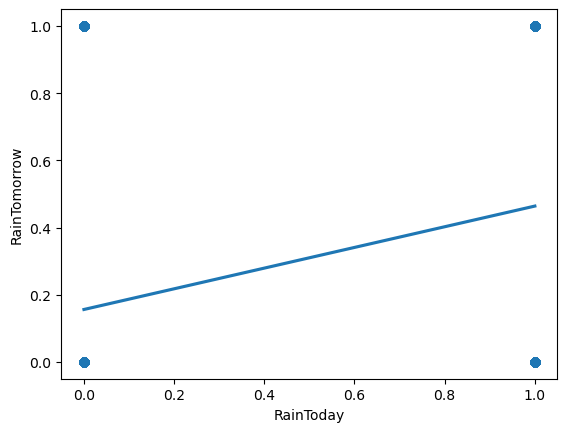

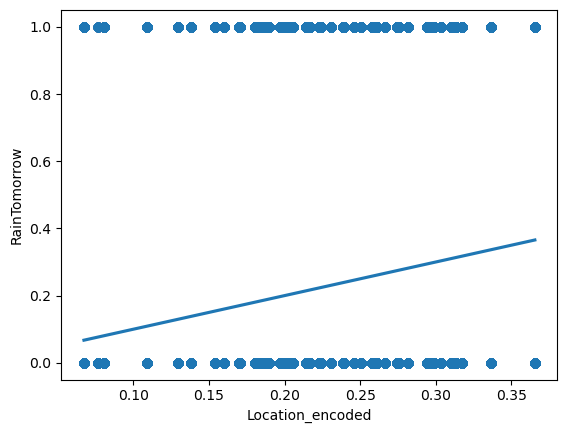

In [112]:
# Create scatterplots
for X_train_sm in ['Rainfall', 'Sunshine', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
                  'Pressure9am','Cloud3pm','Temp9am','RainToday','Location_encoded']:
    sns.regplot(x=X_train_sm, y='RainTomorrow', data=df, scatter=True, ci=None)
    plt.show()

### All the assumptions are met.

# Step 7: Evalution of Model 4

### 7.1) Confusion matrix :- A confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. It can be used to calculate various performance measures, such as accuracy, precision, recall, and F1-score.

* True Positive (TP): The model predicted a positive label and the actual label was also positive.


* False Positive (FP): The model predicted a positive label but the actual label was negative.


* False Negative (FN): The model predicted a negative label but the actual label was positive.


* True Negative (TN): The model predicted a negative label and the actual label was also negative.

In [113]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.predicted)
confusion

array([[78078,  4618],
       [12418, 11474]], dtype=int64)

<AxesSubplot:>

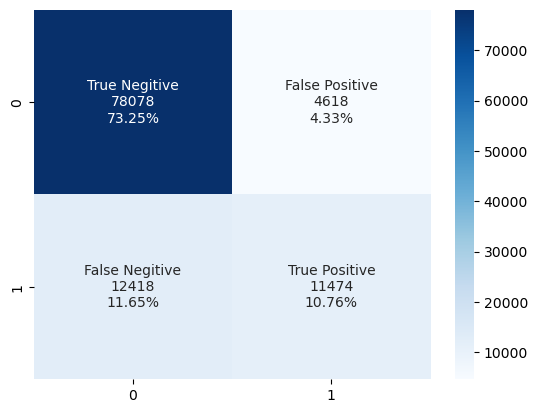

In [114]:
group_names = ['True Negitive','False Positive','False Negitive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt="", cmap='Blues')

In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives  
FP = confusion[0,1] # false positives / Type I Error 
FN = confusion[1,0] # false negatives / Type II Error 

In [116]:
# Calculate various metrics
tn, fp, fn, tp = confusion.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
Error_Rate = (FP+FN)/float(TP+TN+FP+FN)
Specificity = TN /float(TN+FP)       #specificity (true negative rate)
False_Postive_Rate = FP/float(TN+FP)
Negative_predictive_value = TN/float(TN+ FN)

In [117]:
# Print the metrics
print("True Negatives        : ", tn)
print("False Positives       : ", fp)
print("False Negatives       : ", fn)
print("True Positives        : ", tp)
print("-"*50)
print("Accuracy                 : {:.2f}%".format(accuracy*100))
print("Precision                : {:.2f}%".format(precision*100))
print("Recall/Sensitivity       : {:.2f}%".format(recall*100))
print("F1 Score                 : {:.2f}%".format(f1_score*100))
print("Error Rate               : {:.2f}%".format(Error_Rate*100))
print("Specificity              : {:.2f}%".format(Specificity*100))
print("False Postive Rate       : {:.2f}%".format(False_Postive_Rate*100))
print("Negative Predictive Value: {:.2f}%".format(Negative_predictive_value*100))

True Negatives        :  78078
False Positives       :  4618
False Negatives       :  12418
True Positives        :  11474
--------------------------------------------------
Accuracy                 : 84.02%
Precision                : 71.30%
Recall/Sensitivity       : 48.02%
F1 Score                 : 57.39%
Error Rate               : 15.98%
Specificity              : 94.42%
False Postive Rate       : 5.58%
Negative Predictive Value: 86.28%


* Accuracy :- The number of predictions that the model got right.
    
    
* Error Rate :- The number of predictions that the model got wrong.  
    
    
* Precision :- When the model predicts Yes. How often is it actually yes?
* Precision is a measure of the model's ability to correctly identify positive instances. 


* Recall :- When it is actually Yes. How often does it predicted Yes?
* Sensitivity, also known as recall or (true positive rate).


* Specificity (true negative rate) is the probability of a negative test result, conditioned on the individual truly being negative.


* F1 score is a weighted average of precision and recall

## Classification Report

In [118]:
# Generate classification report
class_report = classification_report(y_train_pred_final.RainTomorrow, y_train_pred_final.predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     82696
           1       0.71      0.48      0.57     23892

    accuracy                           0.84    106588
   macro avg       0.79      0.71      0.74    106588
weighted avg       0.83      0.84      0.83    106588



##  Log-Loss Score


the log-loss score measures the performance of a classification model where the predicted output is a probability value between 0 and 1. It penalizes incorrect predictions that are confident and assigns a higher loss to those predictions. A lower log-loss score indicates better performance of the model.

In [119]:
from sklearn.metrics import log_loss

# Compute the log-loss

log_loss_score = log_loss(y_train_pred_final.RainTomorrow, y_train_pred_final.predicted)
print("Log-Loss: ", log_loss_score)

Log-Loss:  5.520380222957847


### 7.2) Plotting the ROC Curve


An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:


* True Positive Rate
* False Positive Rate

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.RainTomorrow, y_train_pred_final.Rain_Tomorrow_Prob,
                                         drop_intermediate = False )

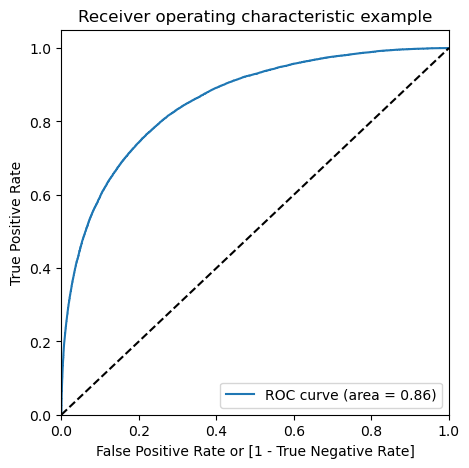

In [122]:
draw_roc(y_train_pred_final.RainTomorrow, y_train_pred_final.Rain_Tomorrow_Prob)

 ## 7.3) Finding Optimal Cutoff Point

In [123]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [124]:
y_train_pred_final.Rain_Tomorrow_Prob

0         0.697287
1         0.280810
2         0.100648
3         0.032606
4         0.236313
            ...   
106583    0.045521
106584    0.041167
106585    0.021301
106586    0.955498
106587    0.315294
Name: Rain_Tomorrow_Prob, Length: 106588, dtype: float64

In [125]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Rain_Tomorrow_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.sample(5)

,RainTomorrow,Rain_Tomorrow_Prob,Location,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
90371,0,0.386518,43903,0,1,1,1,1,0,0,0,0,0,0
85843,0,0.331934,10696,0,1,1,1,1,0,0,0,0,0,0
90472,0,0.181260,46047,0,1,1,0,0,0,0,0,0,0,0
75542,0,0.015375,60,0,1,0,0,0,0,0,0,0,0,0
67622,0,0.459916,12725,0,1,1,1,1,1,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specitivity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specitivity
0.0          0.0  0.224153     1.000000     0.000000
0.1          0.1  0.632839     0.912439     0.552058
0.2          0.2  0.763716     0.786456     0.757147
0.3          0.3  0.813365     0.676879     0.852798
0.4          0.4  0.834081     0.575548     0.908774
0.5          0.5  0.840170     0.480244     0.944157
0.6          0.6  0.836839     0.385150     0.967338
0.7          0.7  0.827044     0.286456     0.983228
0.8          0.8  0.812146     0.184120     0.993591
0.9          0.9  0.790905     0.071823     0.998658


<Figure size 1100x1100 with 0 Axes>

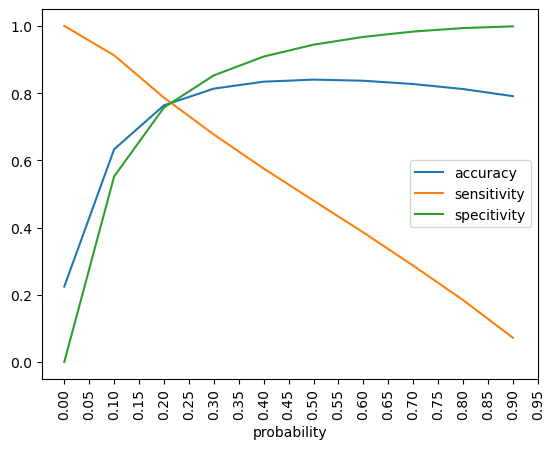

<Figure size 1100x1100 with 0 Axes>

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specitivity'])

plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)

plt.figure(figsize=(11,11))


From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Rain_Tomorrow_Prob.map( lambda x: 1 if x > 0.21 else 0)

y_train_pred_final.sample(8)

,RainTomorrow,Rain_Tomorrow_Prob,Location,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
33492,0,0.096302,83191,0,1,0,0,0,0,0,0,0,0,0,0
95526,0,0.031822,95173,0,1,0,0,0,0,0,0,0,0,0,0
87107,0,0.143983,142381,0,1,1,0,0,0,0,0,0,0,0,0
94071,0,0.042325,124788,0,1,0,0,0,0,0,0,0,0,0,0
23107,0,0.008042,120958,0,1,0,0,0,0,0,0,0,0,0,0
95749,1,0.603028,100075,1,1,1,1,1,1,1,1,0,0,0,1
104908,0,0.011798,8150,0,1,0,0,0,0,0,0,0,0,0,0
105772,1,0.824500,105885,1,1,1,1,1,1,1,1,1,1,0,1


In [129]:
# Let's check the accuracy on trainning data selecting the optimum point.

metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.final_predicted)

0.7706120764063497

In [130]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.final_predicted )
confusion2

array([[63643, 19053],
       [ 5397, 18495]], dtype=int64)

<AxesSubplot:>

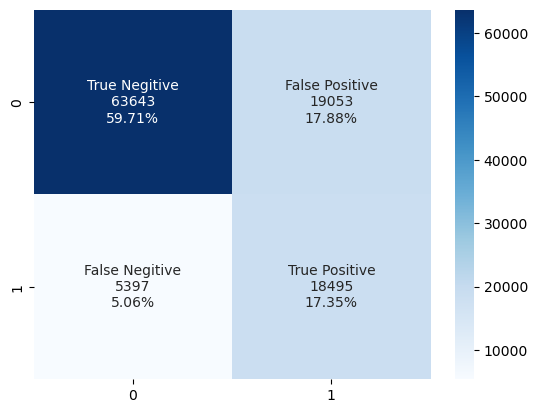

In [131]:
group_names = ['True Negitive','False Positive','False Negitive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion2, annot=labels, fmt="", cmap='Blues')

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Calculate various metrics
tn, fp, fn, tp = confusion2.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
Error_Rate = (FP+FN)/float(TP+TN+FP+FN)
Specificity = TN /float(TN+FP)       #specificity (true negative rate)
False_Postive_Rate = FP/float(TN+FP)
Negative_predictive_value = TN/float(TN+ FN)


# Print the metrics
print("True Negatives        : ", tn)
print("False Positives       : ", fp)
print("False Negatives       : ", fn)
print("True Positives        : ", tp)
print("-"*50)
print("Accuracy                 : {:.2f}%".format(accuracy*100))
print("Precision                : {:.2f}%".format(precision*100))
print("Recall/Sensitivity       : {:.2f}%".format(recall*100))
print("F1 Score                 : {:.2f}%".format(f1_score*100))
print("Error Rate               : {:.2f}%".format(Error_Rate*100))
print("Specificity              : {:.2f}%".format(Specificity*100))
print("False Postive Rate       : {:.2f}%".format(False_Postive_Rate*100))
print("Negative Predictive Value: {:.2f}%".format(Negative_predictive_value*100))

True Negatives        :  63643
False Positives       :  19053
False Negatives       :  5397
True Positives        :  18495
--------------------------------------------------
Accuracy                 : 77.06%
Precision                : 49.26%
Recall/Sensitivity       : 77.41%
F1 Score                 : 60.21%
Error Rate               : 22.94%
Specificity              : 76.96%
False Postive Rate       : 23.04%
Negative Predictive Value: 92.18%


 # Step 8 : Making predictions on the test set

### Scaling the Test Data before making predictions

In [134]:
X_test[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
          'Humidity3pm','Pressure9am','Cloud9am','Cloud3pm','Temp9am']] = scaler.transform(X_test[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
          'Humidity3pm','Pressure9am','Cloud9am','Cloud3pm','Temp9am']])

In [135]:
X_test = X_test[col]
X_test.head()

,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud3pm,Temp9am,RainToday,Location_encoded
82638,0.469888,2.283810,2.375636,0.844558,-0.098784,0.364917,-1.313273,0.001143,-0.863574,1,0.313286
64128,-0.001729,-1.521743,-0.904459,-1.453407,1.644910,0.705916,0.525069,0.001143,-0.369193,0,0.214333
64719,-2.786735,-1.521743,-0.791353,-0.419323,0.640965,1.046915,2.200333,1.660169,-1.234360,0,0.217088
117846,-0.481485,0.457145,0.339715,-0.878916,1.116518,0.023919,-0.483054,-1.667324,-0.384642,1,0.188435
31346,0.945574,-0.760633,0.339715,-0.649119,0.006895,-0.170938,1.844525,0.001143,-1.141664,0,0.259215


In [136]:
X_test.shape

(35530, 11)

In [137]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
82638,0.538446
64128,0.140561
64719,0.231944
117846,0.280981
31346,0.025559


In [138]:
# Adding the test prediction column with original prediction column

y_pred_final = pd.concat([y_test, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'RainTomorrow_Prob'})

y_pred_final.head()

,RainTomorrow,RainTomorrow_Prob
82638,0,0.538446
64128,1,0.140561
64719,0,0.231944
117846,0,0.280981
31346,0,0.025559


In [139]:
# making a new column according optimum cutoff point

y_pred_final['final_predicted'] = y_pred_final.RainTomorrow_Prob.map(lambda x: 1 if x > 0.21 else 0)

y_pred_final.head()

,RainTomorrow,RainTomorrow_Prob,final_predicted
82638,0,0.538446,1
64128,1,0.140561,0
64719,0,0.231944,1
117846,0,0.280981,1
31346,0,0.025559,0


## Confusion Matrix

In [140]:
# Let's check the accuracy on test data.

metrics.accuracy_score(y_pred_final.RainTomorrow, y_pred_final.final_predicted)

0.771742189698846

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final.RainTomorrow, y_pred_final.final_predicted)
confusion2

array([[21272,  6294],
       [ 1816,  6148]], dtype=int64)

<AxesSubplot:>

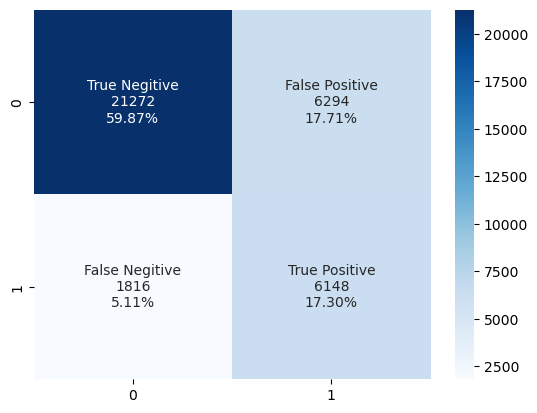

In [142]:
group_names = ['True Negitive','False Positive','False Negitive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion2, annot=labels, fmt="", cmap='Blues')

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Calculate various metrics
tn, fp, fn, tp = confusion2.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
Error_Rate = (FP+FN)/float(TP+TN+FP+FN)
Specificity = TN /float(TN+FP)       #specificity (true negative rate)
False_Postive_Rate = FP/float(TN+FP)
Negative_predictive_value = TN/float(TN+ FN)

# Print the metrics
print("True Negatives        : ", tn)
print("False Positives       : ", fp)
print("False Negatives       : ", fn)
print("True Positives        : ", tp)
print("-"*50)
print("Accuracy                 : {:.2f}%".format(accuracy*100))
print("Precision                : {:.2f}%".format(precision*100))
print("Recall/Sensitivity       : {:.2f}%".format(recall*100))
print("F1 Score                 : {:.2f}%".format(f1_score*100))
print("Error Rate               : {:.2f}%".format(Error_Rate*100))
print("Specificity              : {:.2f}%".format(Specificity*100))
print("False Postive Rate       : {:.2f}%".format(False_Postive_Rate*100))
print("Negative Predictive Value: {:.2f}%".format(Negative_predictive_value*100))

True Negatives        :  21272
False Positives       :  6294
False Negatives       :  1816
True Positives        :  6148
--------------------------------------------------
Accuracy                 : 77.17%
Precision                : 49.41%
Recall/Sensitivity       : 77.20%
F1 Score                 : 60.26%
Error Rate               : 22.83%
Specificity              : 77.17%
False Postive Rate       : 22.83%
Negative Predictive Value: 92.13%


In [145]:
# Generate classification report
class_report = classification_report(y_pred_final.RainTomorrow, y_pred_final.final_predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     27566
           1       0.49      0.77      0.60      7964

    accuracy                           0.77     35530
   macro avg       0.71      0.77      0.72     35530
weighted avg       0.83      0.77      0.79     35530



##  Log-Loss Score

In [146]:
# Compute the log-loss

log_loss_score = log_loss(y_pred_final.RainTomorrow, y_pred_final.final_predicted)
print("Log-Loss: ", log_loss_score)

Log-Loss:  7.883887115928829


# Conlclusion 
For Logistic Regression we found the Area under ROC to be 86% and accuracy on Test data to be 77.17%
* Specificity is 77.17%
* Sensitivity/Recall is 77.20%

# Step 9 : Create a new model using AdaBoost (Adaptive Boosting) with logistic regression to enhance the accuracy

In [147]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [148]:
# create an AdaBoost classifier with decision trees as weak learners
# n_estimators :The maximum number of estimators at which boosting is terminated.
# In case of perfect fit, the learning procedure is stopped early. (default=50)
# learning_rate : Weight applied to each classifier at each boosting iteration.
# A higher learning rate increases the contribution of each classifier.
# There is a trade-off between the `learning_rate` and `n_estimators` parameters.
# A trade-off is a situation where you make a compromise between two things

adaboost_model = AdaBoostClassifier(base_estimator=model, n_estimators=100,learning_rate=1)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train[col], y_train)

# Predict on the test data
y_pred_test = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train[col])
# Evaluate the model
accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of training data: {:.1f}%".format(accuracy1*100))
print("Accuracy of test data: {:.1f}%".format(accuracy*100))

Accuracy of training data: 83.9%
Accuracy of test data: 83.9%


In [149]:
# Making predictions on training data

y_pred = adaboost_model.predict(X_train[col])

print('Model accuracy score: {0:0.3f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score: 0.839


# Step 10) Evaluation of AdaBoost Model

### 10.1) Accuracy: Accuracy is a common metric used to evaluate the classification performance of a model. It measures the percentage of correct predictions made by the model. However, accuracy can be misleading when the classes are imbalanced, and other metrics such as precision, recall, and F1 score should be used.

In [150]:
# make predictions on the test data

y_pred_train = adaboost_model.predict(X_train[col])
y_pred_test = adaboost_model.predict(X_test[col])

# calculate the accuracy of the predictions

accuracy = accuracy_score(y_pred_train, y_train)
accuracy1 = accuracy_score(y_pred_test, y_test)

print('Accuracy on trainning data: %.3f' % accuracy)
print('Accuracy on test data: %.3f' % accuracy)

Accuracy on trainning data: 0.839
Accuracy on test data: 0.839


### 10.2) Confusion Matrix: A confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model. It provides a detailed view of the model's performance and can be used to calculate other evaluation metrics such as accuracy, precision, and recall.

In [151]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[25962  1604]
 [ 4131  3833]]

True Positives(TP) =  25962

True Negatives(TN) =  3833

False Positives(FP) =  1604

False Negatives(FN) =  4131


<AxesSubplot:>

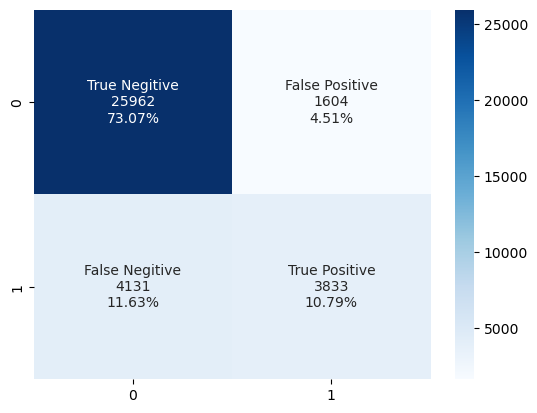

In [152]:
group_names = ['True Negitive','False Positive','False Negitive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

### 10.3) Precision and Recall: Precision measures the proportion of true positives among all positive predictions made by the model, while recall measures the proportion of true positives among all actual positive instances in the data. Both precision and recall are important metrics when the classes are imbalanced, and a trade-off between them can be achieved using the F1 score.

In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives  
FP = confusion[0,1] # false positives / Type I Error 
FN = confusion[1,0] # false negatives / Type II Error 

In [154]:
# Calculate various metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
Error_Rate = (FP+FN)/float(TP+TN+FP+FN)
Specificity = TN /float(TN+FP)       #specificity (true negative rate)
False_Postive_Rate = FP/float(TN+FP)
Negative_predictive_value = TN/float(TN+ FN)

# Print the metrics
print("True Negatives        : ", tn)
print("False Positives       : ", fp)
print("False Negatives       : ", fn)
print("True Positives        : ", tp)
print("-"*50)
print("Accuracy                 : {:.2f}%".format(accuracy*100))
print("Precision                : {:.2f}%".format(precision*100))
print("Recall/Sensitivity       : {:.2f}%".format(recall*100))
print("F1 Score                 : {:.2f}%".format(f1_score*100))
print("Error Rate               : {:.2f}%".format(Error_Rate*100))
print("Specificity              : {:.2f}%".format(Specificity*100))
print("False Postive Rate       : {:.2f}%".format(False_Postive_Rate*100))
print("Negative Predictive Value: {:.2f}%".format(Negative_predictive_value*100))

True Negatives        :  25962
False Positives       :  1604
False Negatives       :  4131
True Positives        :  3833
--------------------------------------------------
Accuracy                 : 83.86%
Precision                : 70.50%
Recall/Sensitivity       : 48.13%
F1 Score                 : 57.20%
Error Rate               : 15.98%
Specificity              : 94.42%
False Postive Rate       : 5.58%
Negative Predictive Value: 86.28%


### 10.4) Receiver Operating Characteristic (ROC) Curve: The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at different threshold values. It is used to evaluate the trade-off between sensitivity and specificity of the model, and the area under the curve (AUC) can be used as a single performance metric.

In [155]:
from sklearn.metrics import roc_curve, auc

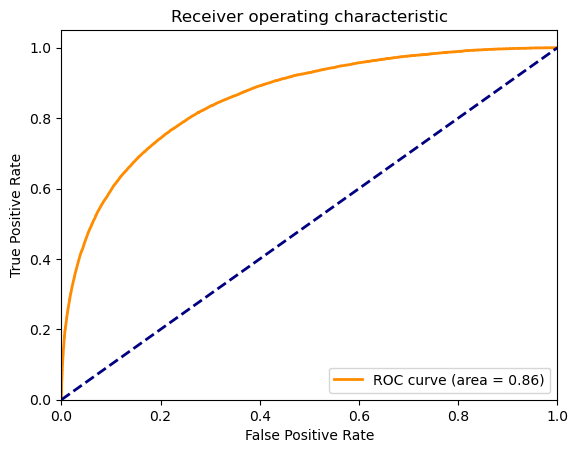

In [156]:
# y_true: true binary labels
# y_score: predicted probabilities of positive class

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### 10.5) Cross-validation is a technique in Machine Learning that is used to evaluate the performance of a model on an independent dataset. In cross-validation, the original dataset is split into two or more subsets: a training dataset and a validation dataset.

In [157]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(adaboost_model, X_train[col], y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.83947838 0.840698   0.84248053 0.83338024 0.8369453  0.8358195
 0.83863402 0.84416925 0.84058923 0.83768062]


In [158]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8390


# Conlclusion 


 For Logistic Regression we found the Area under ROC to be 86% and accuracy on Test data to be 77.17%


* Specificity is 77.17%


* Sensitivity is 77.20%


 For Adaptive Boosting we found the Area under ROC to be 86% and accuracy on Test data to be 83.86%


* Specificity is 94.42%


* Sensitivity is 48.13%


## Save Trained Model To a File Using Joblib

In [159]:
import joblib

In [160]:
joblib.dump(adaboost_model, 'RAIN_PREDICTION_joblib')

['RAIN_PREDICTION_joblib']